# DATA VISUALIZATION

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
import datetime
import pickle
from scipy import stats
from scipy.stats import skew, norm

pd.set_option('display.max_columns', None) # no truncate columns

## Load dataframes

In [2]:
# Environment settings
data_path_out = 'Data/output/'
    
# Deserialize previously saved data from "data-visualization"
df = {}
for df_name in ['train', 'test', 'all']:
    with open(data_path_out+df_name+'_dv.obj', 'rb') as file:
        df[df_name] = pickle.load(file)

## Show Data

In [3]:
# Dataframes shape
for d_name, d in df.items():
    print('{} set has shape {}\n'.format(d_name, d.shape))

train set has shape (523021, 36)

test set has shape (45689, 34)

all set has shape (568710, 34)



In [4]:
# Show Dataframes
from IPython.display import display
for d_name, d in df.items():
    print('{} dataframe:\n'.format(d_name))
    display(d.head())

train dataframe:



StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000 2016-03-01      False    True          False  Hyper Market   
1     1000 2016-03-02      False    True          False  Hyper Market   
2     1000 2016-03-04      False    True          False  Hyper Market   
3     1000 2016-03-05      False    True          False  Hyper Market   
4     1000 2016-03-06      False   False          False  Hyper Market   

  AssortmentType  NearestCompetitor Region  NumberOfCustomers  NumberOfSales  \
0        General                326      7                495           5676   
1        General                326      7                608           8111   
2        General                326      7                665           8300   
3        General                326      7                630           7154   
4        General                326      7                  0              0   

   Region_AreaKM2  Region_GDP  Region_PopulationK  CloudCover     Events  \
0            9643       17130                2770         8.0  Rain-Snow   
1            9643       17130                2770         8.0       Snow   
2            9643       17130                2770         8.0       Rain   
3            9643       17130                2770         6.0        NaN   
4            9643       17130                2770         6.0        NaN   

   Max_Dew_PointC  Max_Gust_SpeedKm_h  Max_Humidity  \
0               1                 NaN           100   
1               0                 NaN            87   
2               0                 NaN            81   
3              -3                 NaN            80   
4               0                 NaN            93   

   Max_Sea_Level_PressurehPa  Max_TemperatureC  Max_VisibilityKm  \
0                       1032                 2              19.0   
1                       1030                 5              23.0   
2                       1026                 4              31.0   
3                       1027                 8              31.0   
4                       1025                 7              31.0   

   Max_Wind_SpeedKm_h  Mean_Dew_PointC  Mean_Humidity  \
0                  21               -1             82   
1                  16               -1             73   
2                  23               -1             71   
3                  19               -4             56   
4                  16               -3             75   

   Mean_Sea_Level_PressurehPa  Mean_TemperatureC  Mean_VisibilityKm  \
0                        1030                  1               11.0   
1                        1027                  3               13.0   
2                        1024                  3               11.0   
3                        1024                  3               15.0   
4                        1023                  1               12.0   

   Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0                   16              -2            70   
1                   10              -2            58   
2                   10              -3            55   
3                   10              -6            25   
4                    5              -6            48   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                       1029                 1               6.0   
1                       1025                 1              10.0   
2                       1023                 2               8.0   
3                       1022                -1              10.0   
4                       1022                -5               5.0   

   Precipitationmm  WindDirDegrees  
0              0.0              23  
1              0.0              56  
2              0.0              22  
3              0.0             108  
4              0.0              46

test dataframe:



StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000 2018-03-01      False    True          False  Hyper Market   
1     1000 2018-03-02      False    True          False  Hyper Market   
2     1000 2018-03-03      False    True          False  Hyper Market   
3     1000 2018-03-04      False   False          False  Hyper Market   
4     1000 2018-03-05      False    True           True  Hyper Market   

  AssortmentType  NearestCompetitor Region  Region_AreaKM2  Region_GDP  \
0        General                326      7            9643       17130   
1        General                326      7            9643       17130   
2        General                326      7            9643       17130   
3        General                326      7            9643       17130   
4        General                326      7            9643       17130   

   Region_PopulationK  CloudCover     Events  Max_Dew_PointC  \
0                2770         6.0       Rain               3   
1                2770         7.0       Rain               4   
2                2770         2.0   Fog-Rain               2   
3                2770         6.0       Rain               7   
4                2770         4.0  Rain-Snow               7   

   Max_Gust_SpeedKm_h  Max_Humidity  Max_Sea_Level_PressurehPa  \
0                 NaN            95                       1022   
1                 NaN            99                       1021   
2                 NaN           100                       1023   
3                 NaN            97                       1014   
4                61.0            87                       1018   

   Max_TemperatureC  Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  \
0                 9              31.0                  18                2   
1                 5              31.0                  19                2   
2                 8              31.0                  18               -1   
3                10              31.0                  29                4   
4                10              26.0                  42                1   

   Mean_Humidity  Mean_Sea_Level_PressurehPa  Mean_TemperatureC  \
0             75                        1019                  6   
1             83                        1013                  4   
2             74                        1020                  3   
3             83                        1007                  6   
4             65                        1007                  6   

   Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0               14.0                    5              -1            46   
1               12.0                    6              -1            52   
2               13.0                   11              -3            41   
3               11.0                   18              -2            65   
4               10.0                   23              -5            25   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                       1011                 2              10.0   
1                       1009                 3              10.0   
2                       1013                -2              10.0   
3                       1002                 1               6.0   
4                       1000                 2               8.0   

   Precipitationmm  WindDirDegrees  
0             0.00             180  
1             5.08             315  
2             0.00             210  
3             3.05             193  
4             0.25             247

all dataframe:



StoreID       Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000 2016-03-01      False    True          False  Hyper Market   
1     1000 2016-03-02      False    True          False  Hyper Market   
2     1000 2016-03-04      False    True          False  Hyper Market   
3     1000 2016-03-05      False    True          False  Hyper Market   
4     1000 2016-03-06      False   False          False  Hyper Market   

  AssortmentType  NearestCompetitor Region  Region_AreaKM2  Region_GDP  \
0        General                326      7            9643       17130   
1        General                326      7            9643       17130   
2        General                326      7            9643       17130   
3        General                326      7            9643       17130   
4        General                326      7            9643       17130   

   Region_PopulationK  CloudCover     Events  Max_Dew_PointC  \
0                2770         8.0  Rain-Snow               1   
1                2770         8.0       Snow               0   
2                2770         8.0       Rain               0   
3                2770         6.0        NaN              -3   
4                2770         6.0        NaN               0   

   Max_Gust_SpeedKm_h  Max_Humidity  Max_Sea_Level_PressurehPa  \
0                 NaN           100                       1032   
1                 NaN            87                       1030   
2                 NaN            81                       1026   
3                 NaN            80                       1027   
4                 NaN            93                       1025   

   Max_TemperatureC  Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  \
0                 2              19.0                  21               -1   
1                 5              23.0                  16               -1   
2                 4              31.0                  23               -1   
3                 8              31.0                  19               -4   
4                 7              31.0                  16               -3   

   Mean_Humidity  Mean_Sea_Level_PressurehPa  Mean_TemperatureC  \
0             82                        1030                  1   
1             73                        1027                  3   
2             71                        1024                  3   
3             56                        1024                  3   
4             75                        1023                  1   

   Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC  Min_Humidity  \
0               11.0                   16              -2            70   
1               13.0                   10              -2            58   
2               11.0                   10              -3            55   
3               15.0                   10              -6            25   
4               12.0                    5              -6            48   

   Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
0                       1029                 1               6.0   
1                       1025                 1              10.0   
2                       1023                 2               8.0   
3                       1022                -1              10.0   
4                       1022                -5               5.0   

   Precipitationmm  WindDirDegrees  
0              0.0              23  
1              0.0              56  
2              0.0              22  
3              0.0             108  
4              0.0              46

In [5]:
# define name aliases
train = df['train']
test = df['test']
all_data = df['all']

## Categorical features

In [6]:
cat_features = all_data.select_dtypes(exclude=[np.number])

print("There are {} categorical features ({:.2f}% of total) "
      .format(cat_features.shape[1],
              (cat_features.shape[1]/all_data.shape[1])*100))

There are 8 categorical features (23.53% of total) 


In [7]:
all_data.describe(exclude=[np.number])

Date IsHoliday  IsOpen HasPromotions     StoreType  \
count                568710    568710  568710        568710        568710   
unique                  790         2       2             2             4   
top     2018-01-09 00:00:00     False    True         False  Hyper Market   
freq                    749    551669  471544        352511        318206   
first   2016-03-01 00:00:00       NaN     NaN           NaN           NaN   
last    2018-04-30 00:00:00       NaN     NaN           NaN           NaN   

       AssortmentType  Region  Events  
count          568710  568710  428171  
unique              3      11      21  
top           General       9    Rain  
freq           322296  133510  220716  
first             NaN     NaN     NaN  
last              NaN     NaN     NaN

### 1.1 Date manipulation
The Python datetime library provides several useful objects to manipulate times and dates

In [8]:
all_data.Date.head()

0   2016-03-01
1   2016-03-02
2   2016-03-04
3   2016-03-05
4   2016-03-06
Name: Date, dtype: datetime64[ns]

### Missing values
As seen by the describe function , the only categorical features with missing values is Events.

In [9]:
print ("There are {} missing values of Events({:.2f}%)"
       .format(all_data['Events'].isna().sum(),
               all_data['Events'].isna().sum()/all_data.shape[0]*100))

There are 140539 missing values of Events(24.71%)


In [10]:
all_data['Events'].unique()

array(['Rain-Snow', 'Snow', 'Rain', nan, 'Fog-Rain', 'Fog-Rain-Snow',
       'Fog', 'Rain-Thunderstorm', 'Rain-Hail', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Hail-Thunderstorm', 'Rain-Snow-Hail',
       'Fog-Rain-Snow-Hail', 'Fog-Snow', 'Snow-Hail', 'Fog-Thunderstorm',
       'Thunderstorm', 'Fog-Snow-Hail', 'Rain-Snow-Hail-Thunderstorm',
       'Fog-Rain-Hail', 'Rain-Hail-Thunderstorm',
       'Rain-Snow-Thunderstorm'], dtype=object)

There are 21 unique events (nan included). All events seem to indicate bad weather condition. Let's check what the NaN values could be.

In [11]:
nan_index = all_data[all_data['Events'].isnull()].index.tolist()
meteo_columns =\
['Precipitationmm', 'Mean_Humidity', 'Mean_TemperatureC', 'CloudCover', 'Mean_VisibilityKm']

for column in meteo_columns:
    print('{} of NaN Events {:.2f} with general mean {:.2f}'
          .format(column,
                  all_data.loc[nan_index, column].mean(),
                  all_data[column].mean()))

Precipitationmm of NaN Events 0.01 with general mean 0.78
Mean_Humidity of NaN Events 64.38 with general mean 74.30
Mean_TemperatureC of NaN Events 10.98 with general mean 10.01
CloudCover of NaN Events 4.96 with general mean 5.56
Mean_VisibilityKm of NaN Events 15.27 with general mean 12.25


As seen in the previous analysis ,NaN Events have generally less rain ,humidity and cloud cover.<br> The visibility is generally higher whereas the temperature more ore less within the dataset mean.

It's seems that NaN events correspond to Normal weather conditions.

## 2. Numerical features

In [12]:
numeric_features = all_data.select_dtypes(include=[np.number])

print("There are {} numeric features ({:.2f}% of total) "
      .format(numeric_features.shape[1],
              (numeric_features.shape[1]/all_data.shape[1])*100))

There are 26 numeric features (76.47% of total) 


In [13]:
all_data.describe()

StoreID  NearestCompetitor  Region_AreaKM2     Region_GDP  \
count  568710.000000      568710.000000   568710.000000  568710.000000   
mean     1373.957616        7999.119534    12448.404758   14057.774367   
std       216.381498       11529.083651     9197.663508    2753.553082   
min      1000.000000          47.000000      344.000000    9893.000000   
25%      1187.000000        1057.000000     7215.000000   11849.000000   
50%      1373.000000        3321.000000     9643.000000   15017.000000   
75%      1561.000000        9673.000000    15566.000000   15931.000000   
max      1748.000000       85070.000000    32221.000000   23931.000000   

       Region_PopulationK     CloudCover  Max_Dew_PointC  Max_Gust_SpeedKm_h  \
count       568710.000000  519111.000000   568710.000000       124325.000000   
mean          3867.832217       5.560682        8.196299           48.544918   
std           2814.035417       1.717195        5.905485           13.392765   
min            816.000000       0.000000      -14.000000           21.000000   
25%           1293.000000       5.000000        4.000000           39.000000   
50%           2770.000000       6.000000        8.000000           47.000000   
75%           5727.000000       7.000000       13.000000           55.000000   
max           8146.000000       8.000000       23.000000          106.000000   

        Max_Humidity  Max_Sea_Level_PressurehPa  Max_TemperatureC  \
count  568710.000000              568710.000000     568710.000000   
mean       93.401607                1018.554787         14.250695   
std         7.622350                   8.128224          7.997932   
min        44.000000                 976.000000        -11.000000   
25%        89.000000                1013.000000          8.000000   
50%        94.000000                1019.000000         14.000000   
75%       100.000000                1024.000000         20.000000   
max       100.000000                1043.000000         37.000000   

       Max_VisibilityKm  Max_Wind_SpeedKm_h  Mean_Dew_PointC  Mean_Humidity  \
count     554751.000000       568710.000000    568710.000000  568710.000000   
mean          23.649191           22.405618         5.872554      74.302602   
std            9.134519            8.958702         5.830991      12.977769   
min            0.000000            3.000000       -15.000000      30.000000   
25%           11.000000           16.000000         2.000000      65.000000   
50%           31.000000           21.000000         6.000000      76.000000   
75%           31.000000           27.000000        11.000000      84.000000   
max           31.000000          101.000000        20.000000     100.000000   

       Mean_Sea_Level_PressurehPa  Mean_TemperatureC  Mean_VisibilityKm  \
count               568710.000000      568710.000000      554751.000000   
mean                  1015.373630          10.011000          12.250188   
std                      8.443824           6.883573           5.017721   
min                    974.000000         -13.000000           0.000000   
25%                   1010.000000           4.000000          10.000000   
50%                   1016.000000          10.000000          11.000000   
75%                   1021.000000          16.000000          14.000000   
max                   1040.000000          30.000000          31.000000   

       Mean_Wind_SpeedKm_h  Min_Dew_PointC   Min_Humidity  \
count        568710.000000   568710.000000  568710.000000   
mean             11.784913        3.340256      50.406260   
std               5.878919        5.895683      19.309611   
min               2.000000      -18.000000       8.000000   
25%               8.000000       -1.000000      35.000000   
50%              11.000000        3.000000      50.000000   
75%              14.000000        8.000000      65.000000   
max              53.000000       18.000000     100.000000   

       Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_Visibilit

### 2.1 Numerical missing values

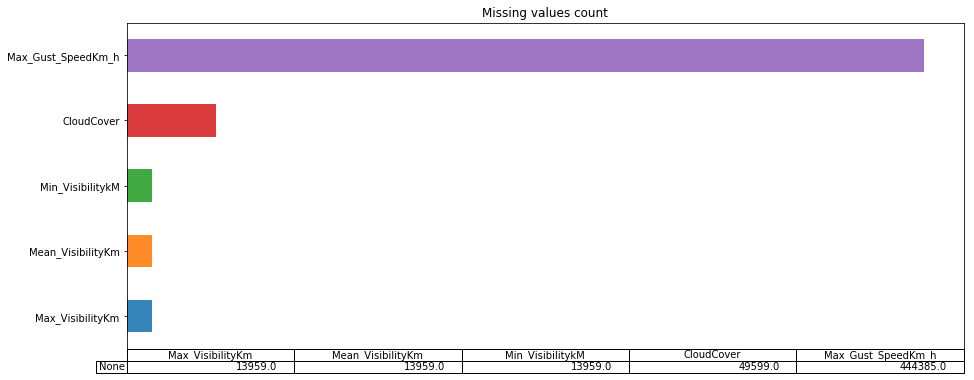

In [14]:
# Missing values
plt.figure(figsize=(15,6))
rows_length = numeric_features.shape[0]
numeric_nan_length = numeric_features.isna().sum().where(lambda x : x > 0).dropna()
numeric_nan_length = numeric_nan_length.sort_values()
ax = numeric_nan_length \
.plot(kind='barh', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels

## Data exploration

### Number of stores per region

In [15]:
all_data.groupby(['StoreType'])['HasPromotions'].count()
storeregions=all_data.groupby(['Region'])['StoreID'].unique()
total_stores=0;
store_dict = {}
for i in range(0,11):
    total_stores+=len(storeregions[i])
    store_dict[i]=len(storeregions[i])

print("Total stores {} ".format(total_stores))
for i,k in store_dict.items():
    print("Region {} has {} stores ({:.2f}% of total)".format(i,k, (k/total_stores)*100))

Total stores 749 
Region 0 has 55 stores (7.34% of total)
Region 1 has 24 stores (3.20% of total)
Region 2 has 89 stores (11.88% of total)
Region 3 has 125 stores (16.69% of total)
Region 4 has 92 stores (12.28% of total)
Region 5 has 18 stores (2.40% of total)
Region 6 has 51 stores (6.81% of total)
Region 7 has 62 stores (8.28% of total)
Region 8 has 169 stores (22.56% of total)
Region 9 has 36 stores (4.81% of total)
Region 10 has 28 stores (3.74% of total)


### Number of shops per shop type

In [16]:
storenames=all_data['StoreType'].unique()
shopping_center=all_data[all_data['StoreType']== 'Shopping Center']
storetype = all_data.groupby(['StoreType'])['StoreID'].unique()
for x in range(0,4):
    print("There are {} shops of type {}".format(len(storetype[x]),storenames[x]))

There are 417 shops of type Hyper Market
There are 218 shops of type Super Market
There are 105 shops of type Standard Market
There are 9 shops of type Shopping Center


## 3. Time - sales visualization

In [17]:
dic_train = {'IsHoliday':'mean',
       'IsOpen':'mean',
       'HasPromotions':'mean',
       'NearestCompetitor':'mean',
       'NumberOfCustomers':'sum',
       'NumberOfSales':'sum',
       'Region_AreaKM2':'mean',
       'Region_GDP':'mean',
       'Region_PopulationK':'mean',
       'Max_Gust_SpeedKm_h':'mean',
       'Max_Humidity':'mean',
       'Max_Sea_Level_PressurehPa':'mean',
       'Max_TemperatureC':'mean',
       'Max_VisibilityKm':'mean',
       'Max_Wind_SpeedKm_h':'mean',
       'Mean_Dew_PointC':'mean',
       'Mean_Humidity':'mean',
       'Mean_Sea_Level_PressurehPa':'mean',
       'Mean_TemperatureC':'mean',
       'Mean_VisibilityKm':'mean',
       'Mean_Wind_SpeedKm_h':'mean',
       'Min_Dew_PointC':'mean',
       'Min_Humidity':'mean',
       'Min_Sea_Level_PressurehPa':'mean',
       'Min_TemperatureC':'mean',
       'Min_VisibilitykM':'mean',
       'Precipitationmm':'mean',
       'WindDirDegrees':'mean'}

dic_all = dic_train.copy()
del dic_all['NumberOfSales']
del dic_all['NumberOfCustomers']

monthly_sales_train=train.groupby(["Region","StoreID",pd.Grouper(key = 'Date',freq='M')]).\
agg(dic_train).reset_index()

monthly_sales_all=all_data.groupby(["Region","StoreID",pd.Grouper(key = 'Date',freq='M')]).\
agg(dic_all).reset_index()

##### Sales per month for each region

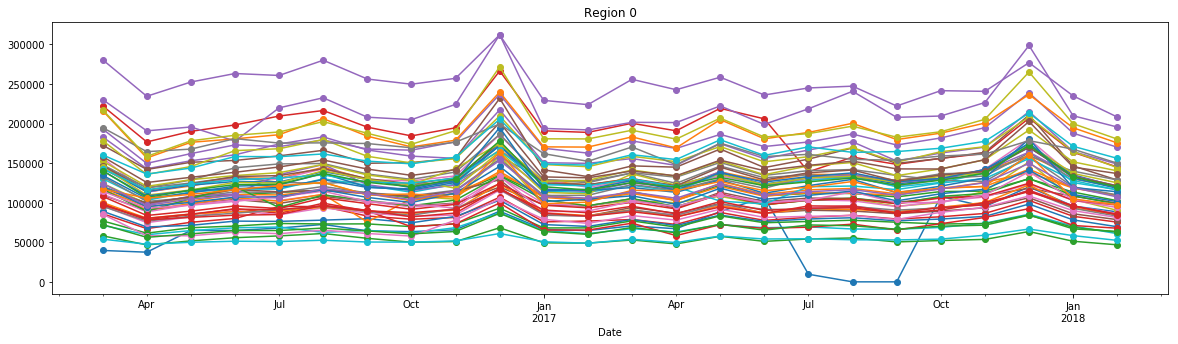

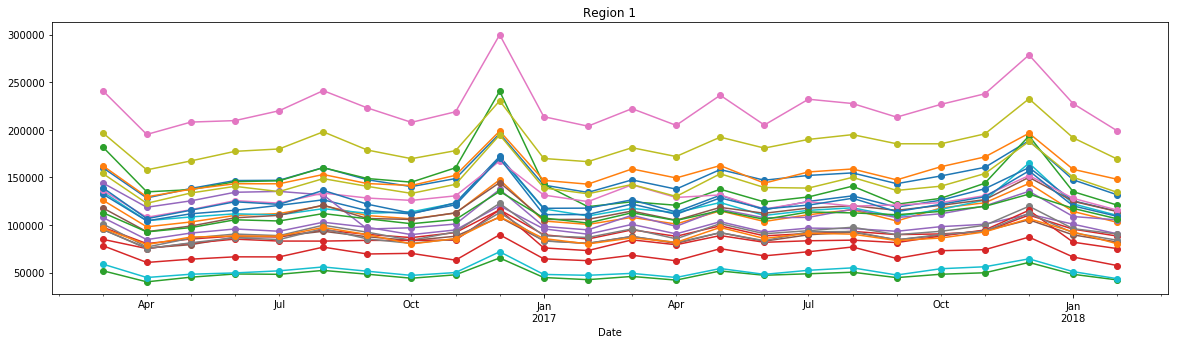

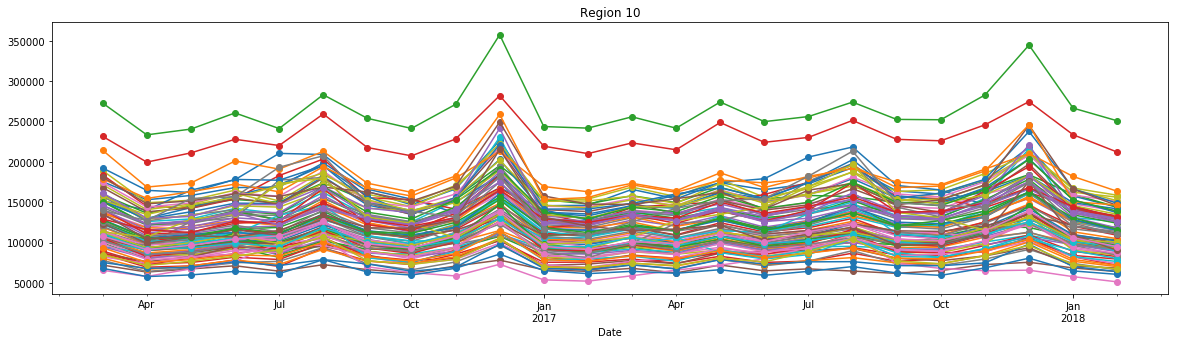

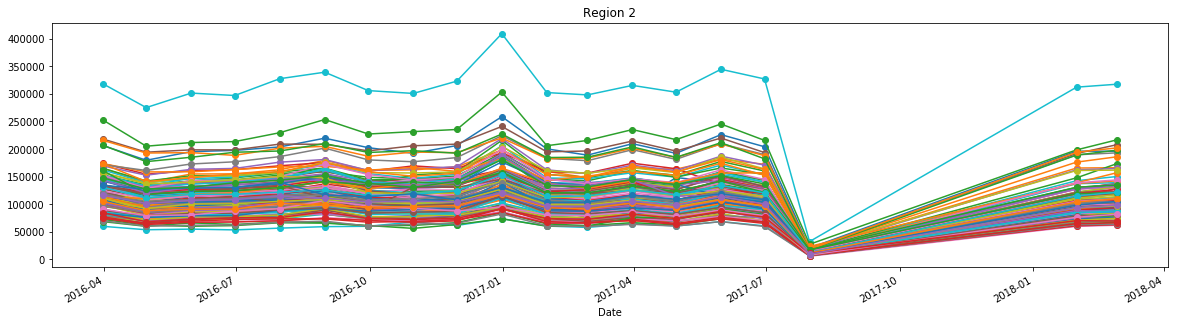

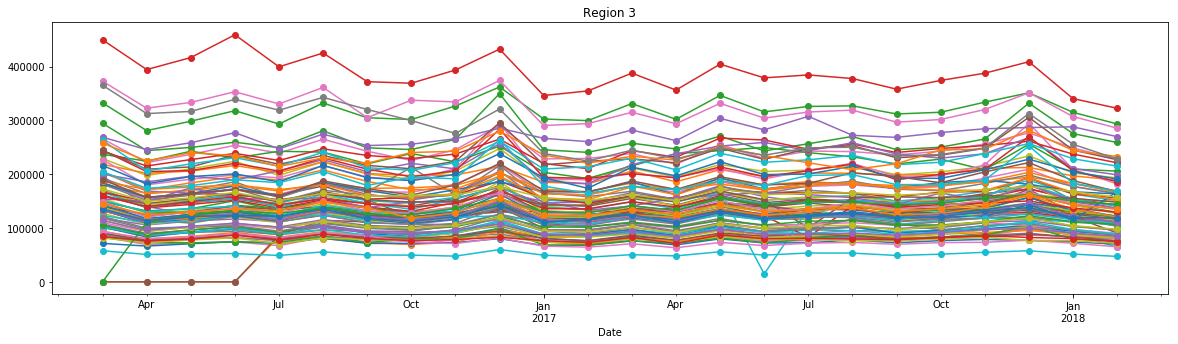

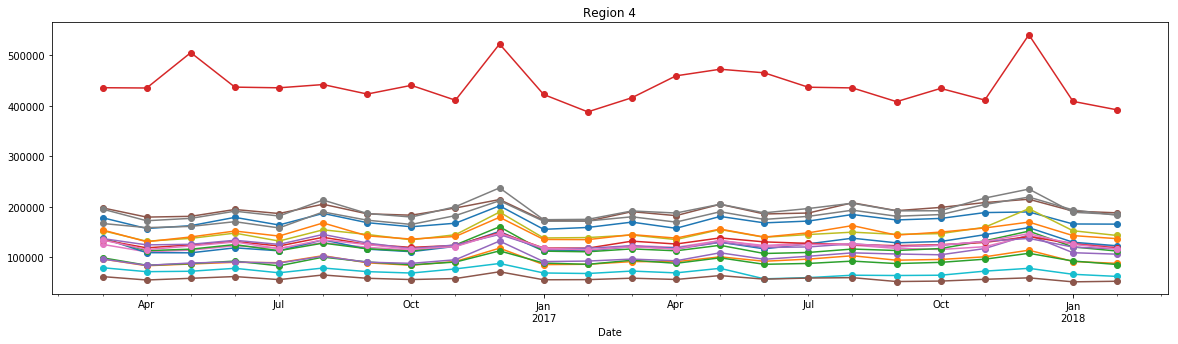

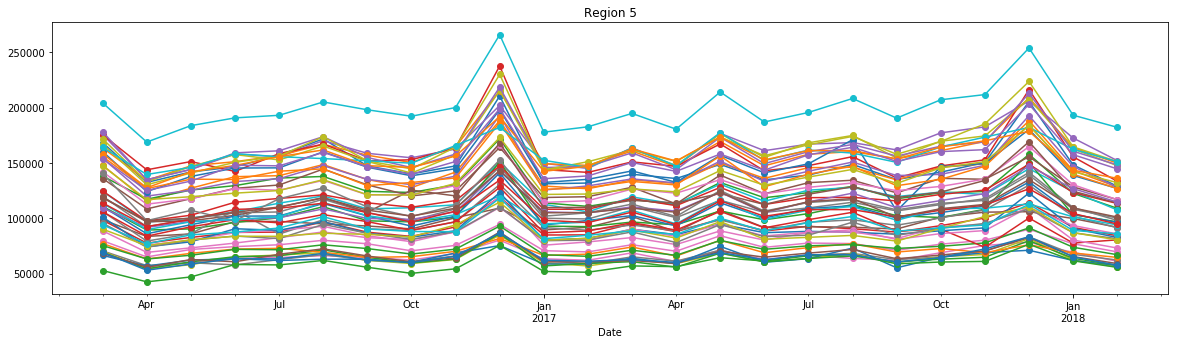

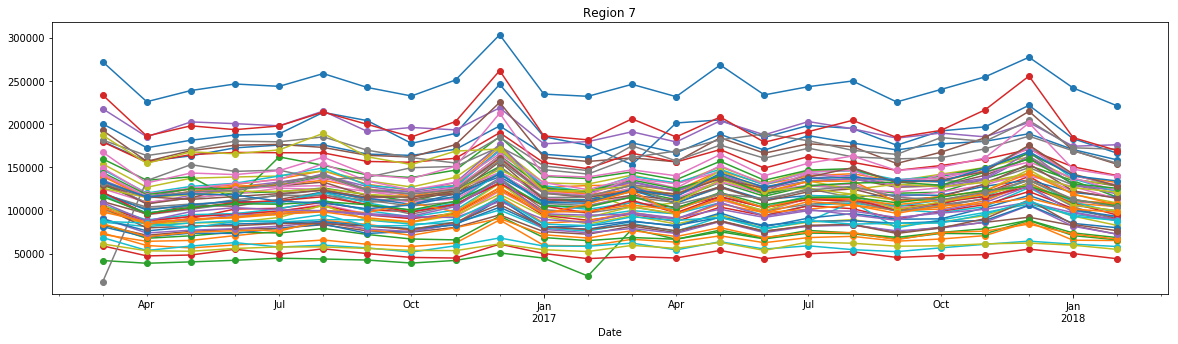

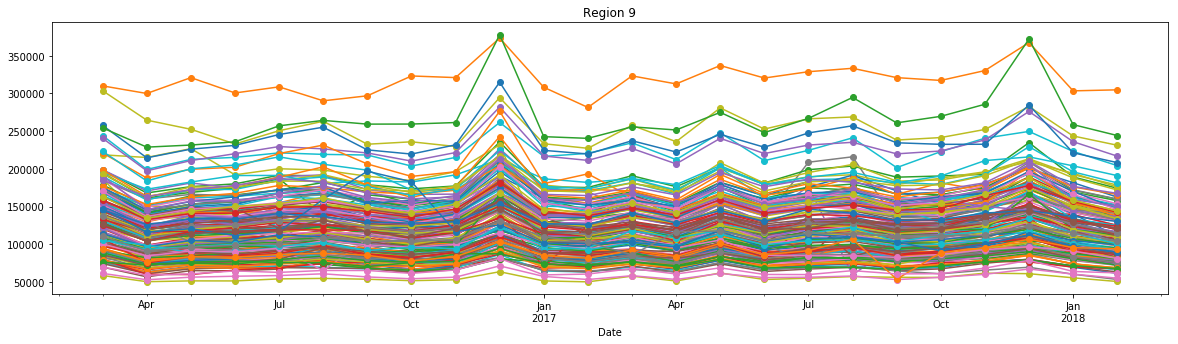

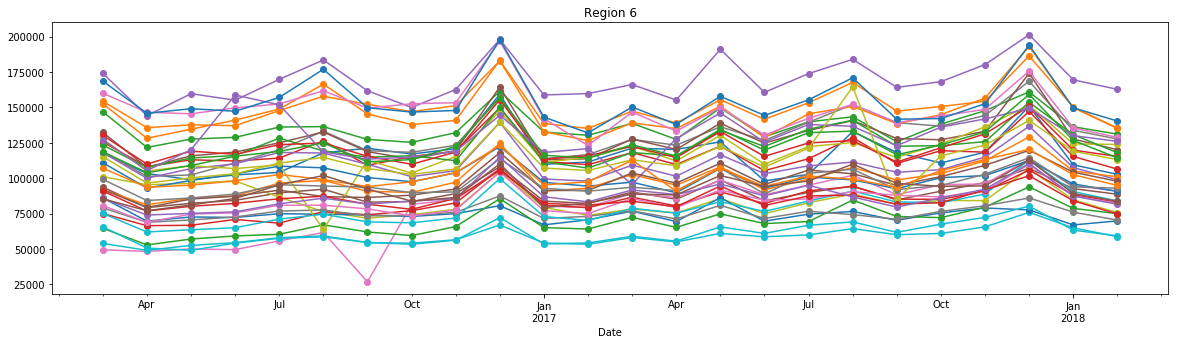

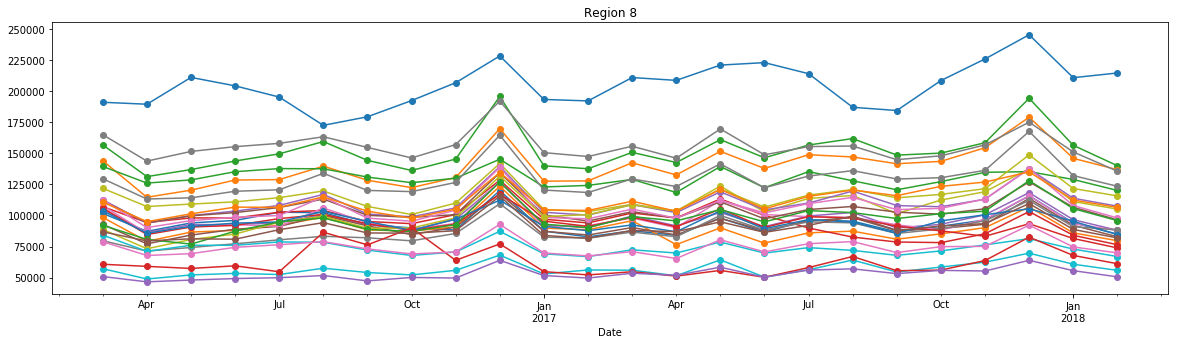

In [18]:
for regionID, region in monthly_sales_train.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['NumberOfSales'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

##### Percentage of days a store is open for each region

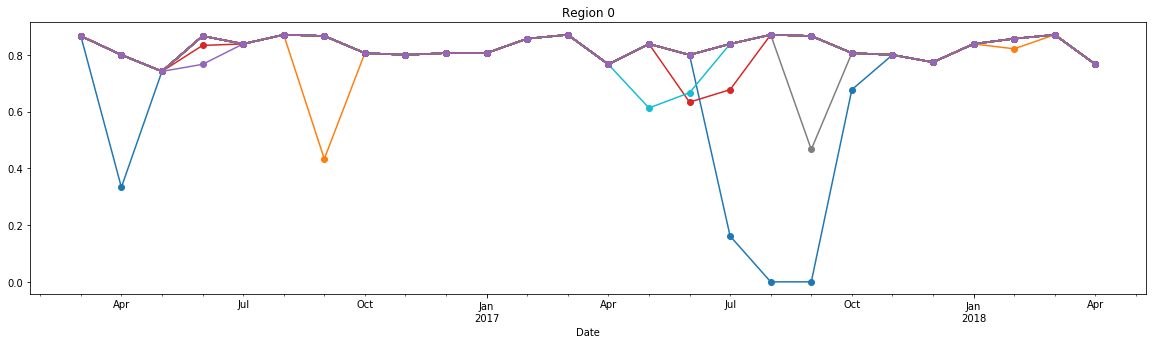

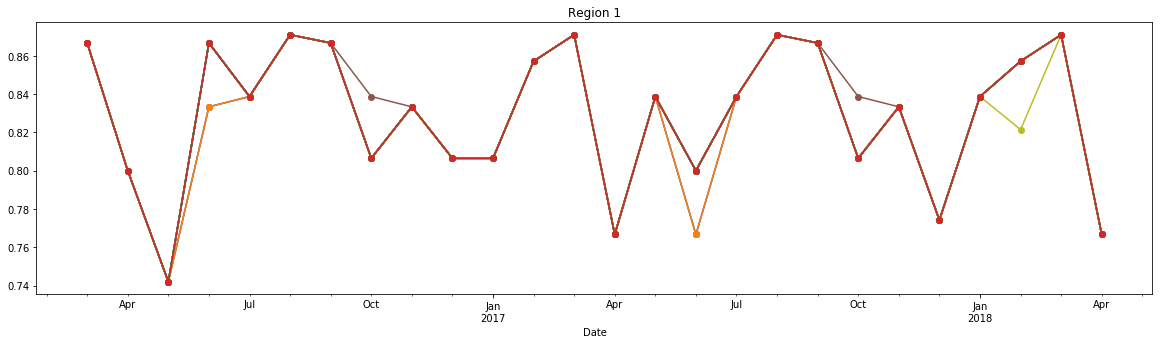

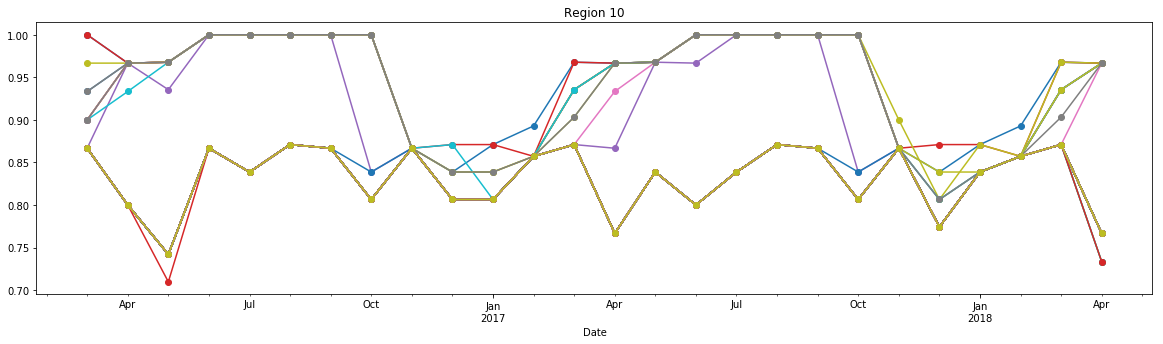

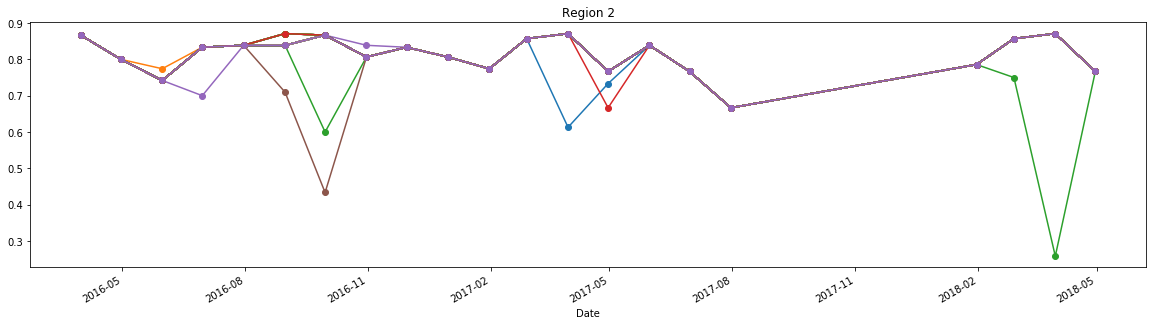

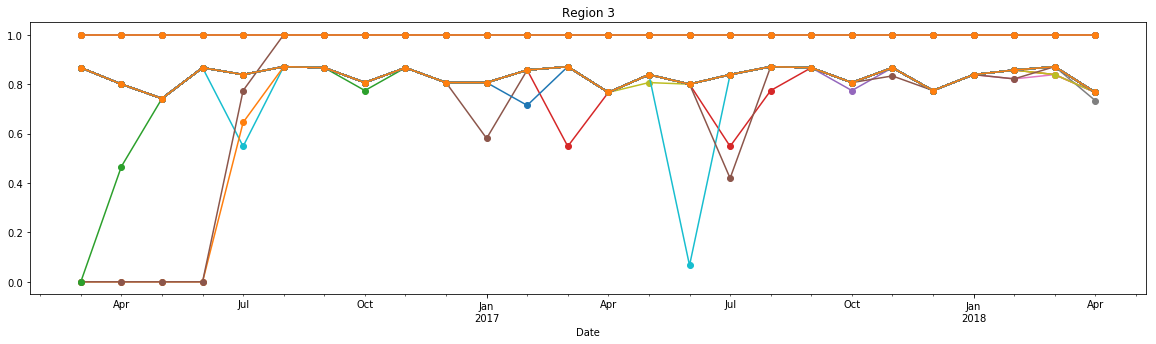

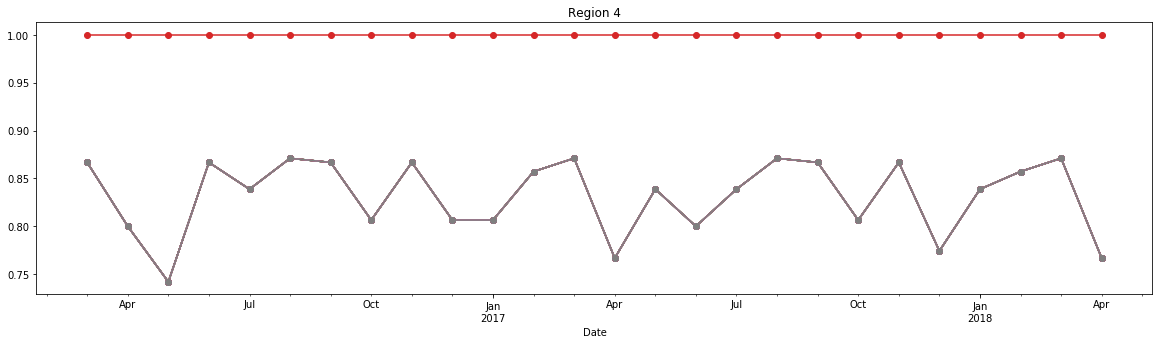

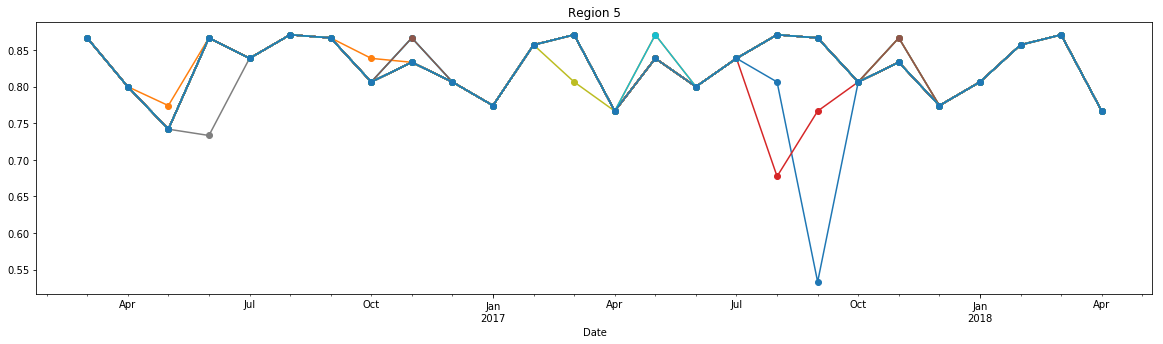

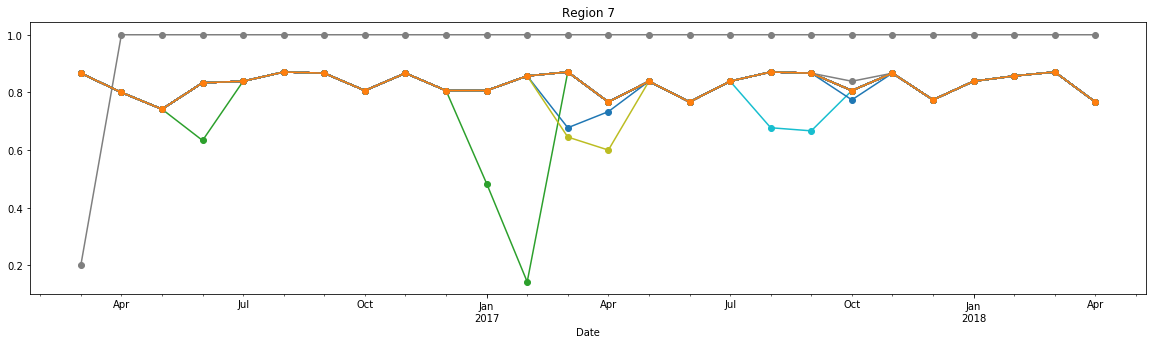

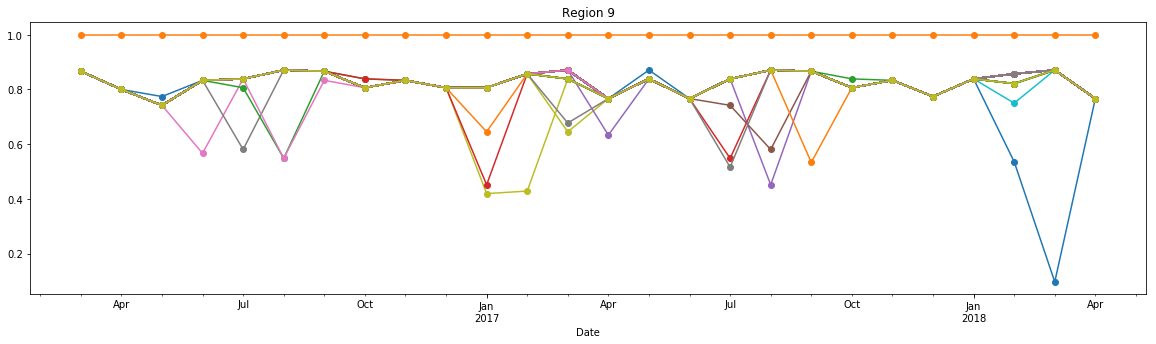

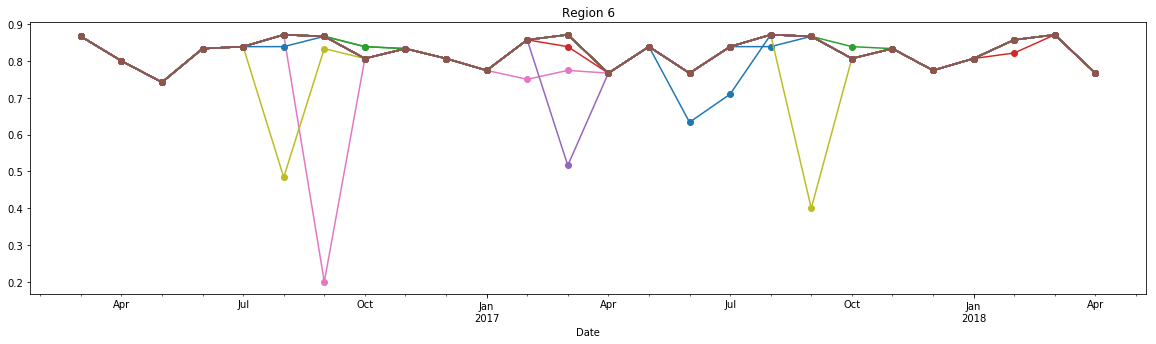

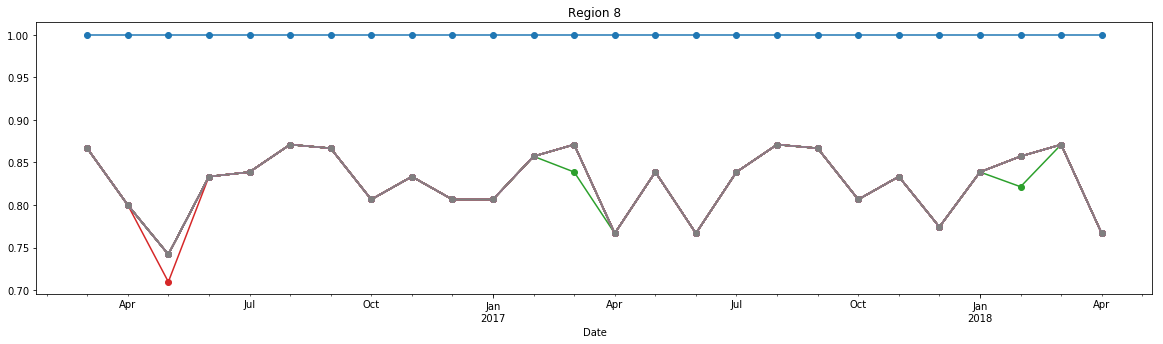

In [19]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['IsOpen'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

##### Percentage of holidays in a month for each region

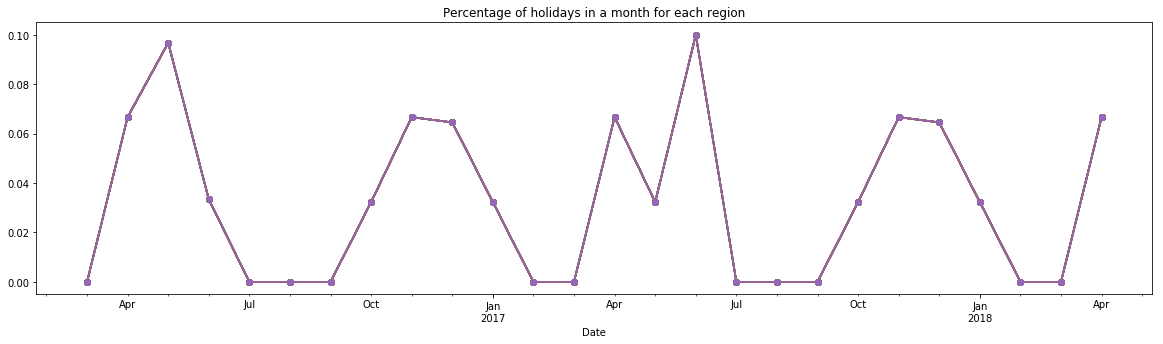

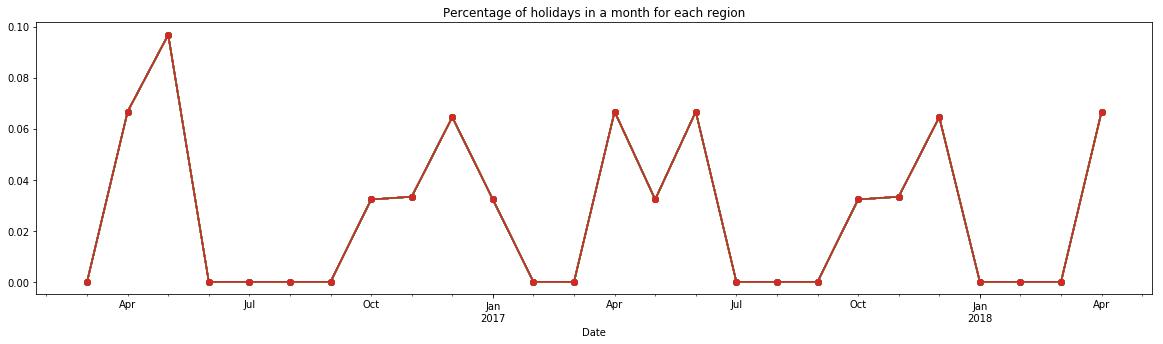

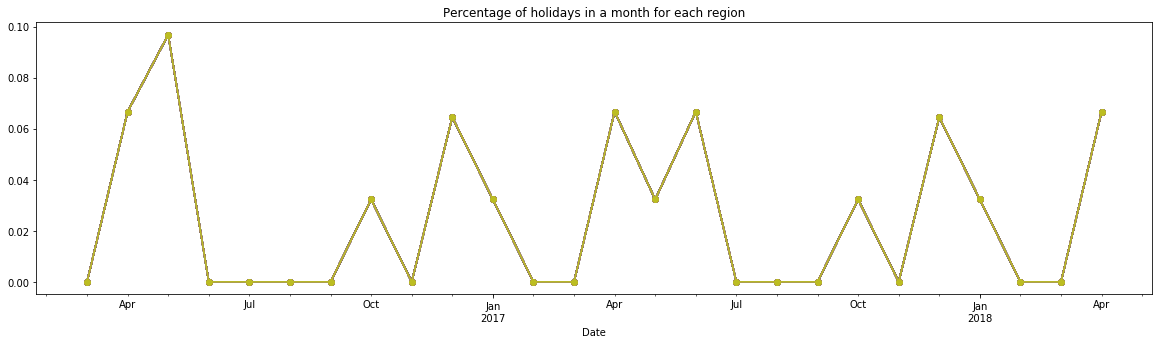

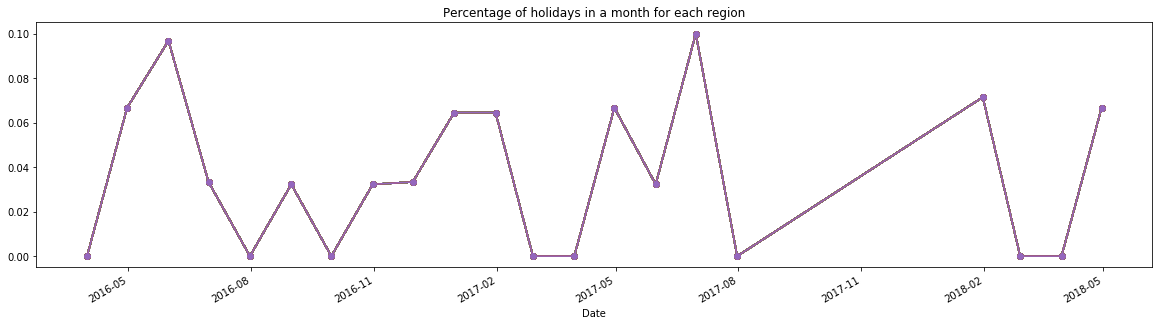

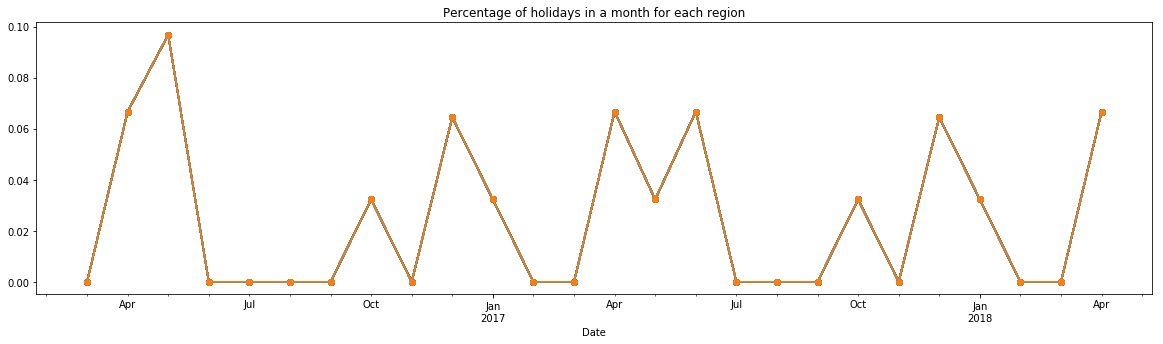

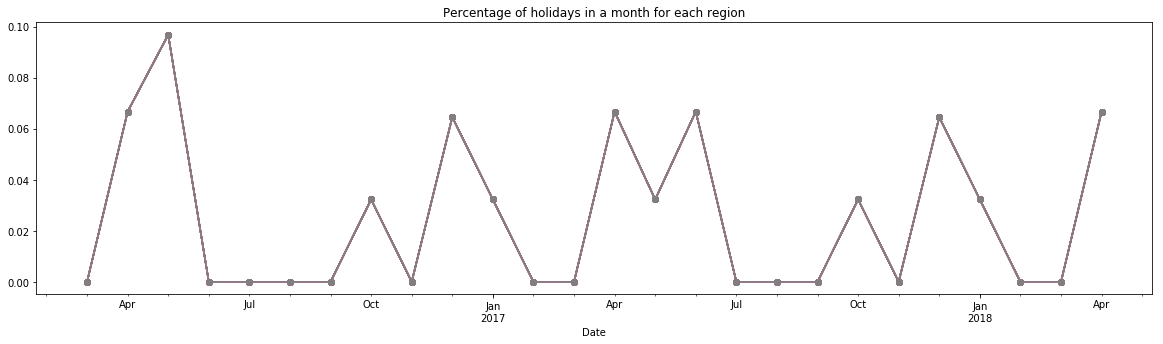

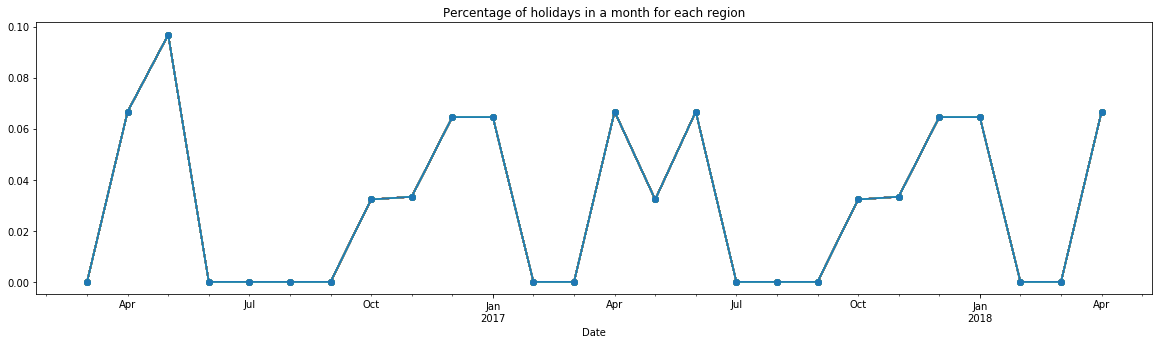

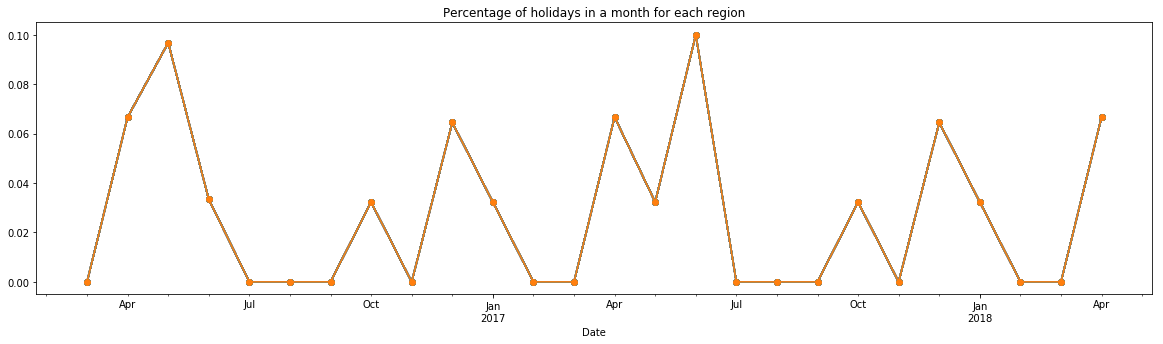

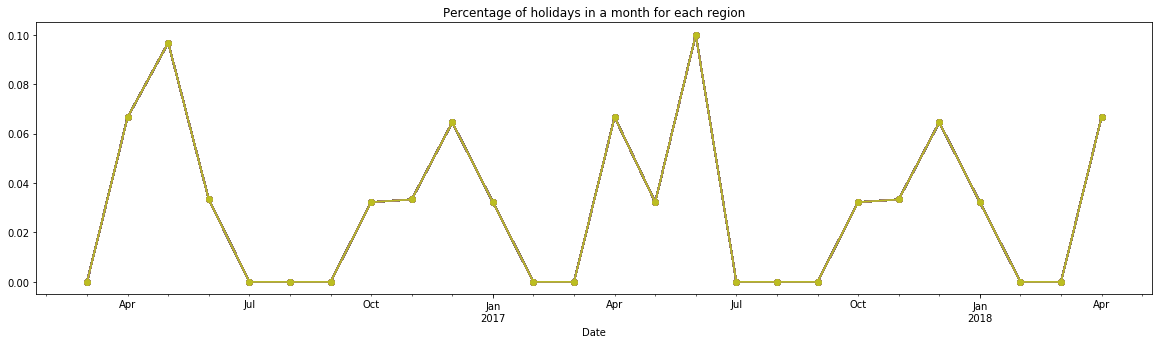

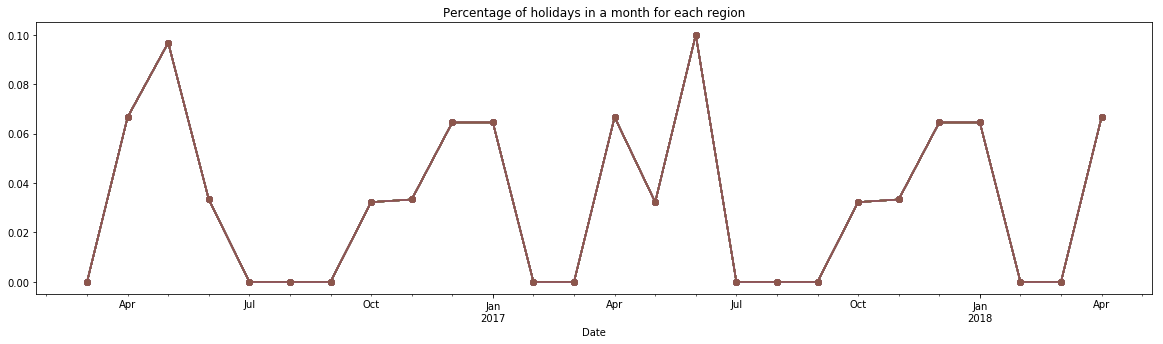

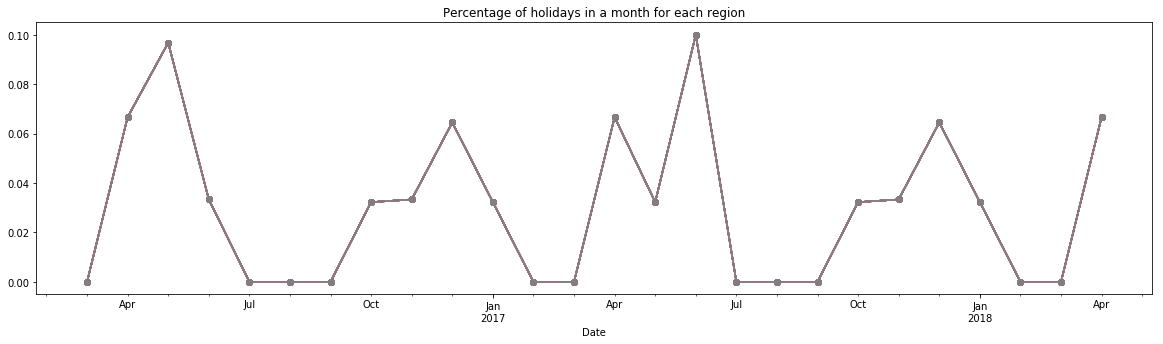

In [20]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['IsHoliday'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Percentage of holidays in a month for each region', marker='o')
    plt.show()

##### Percentage of days a store has a promotion for each region

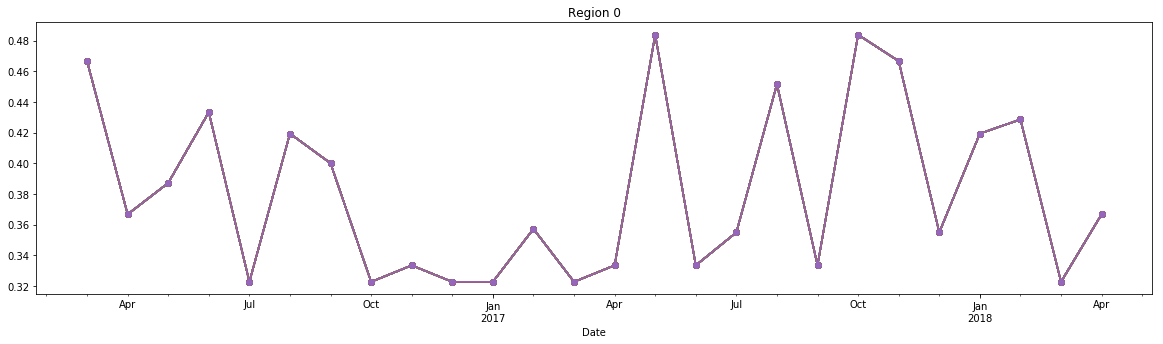

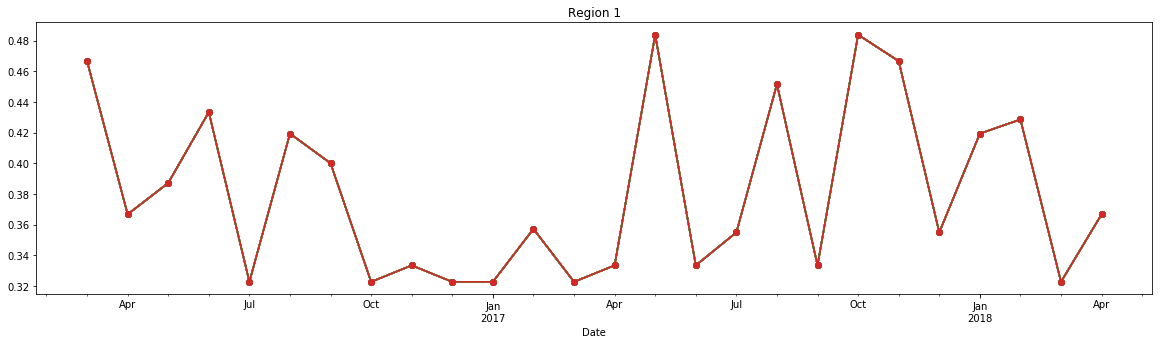

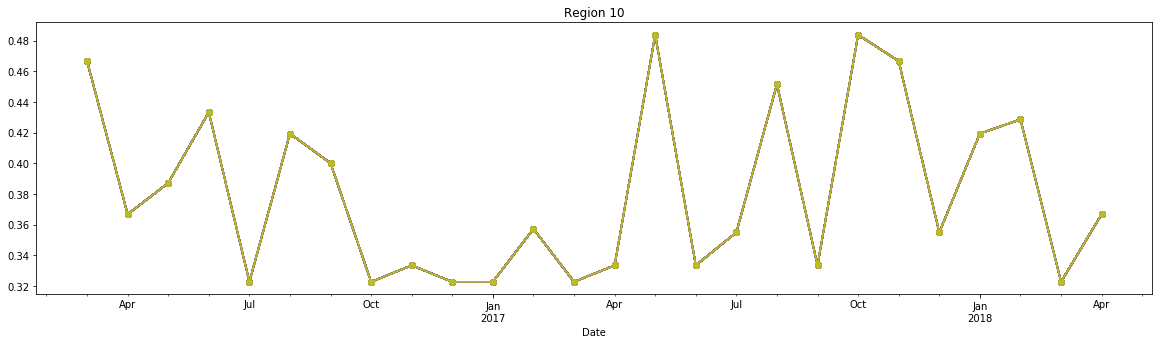

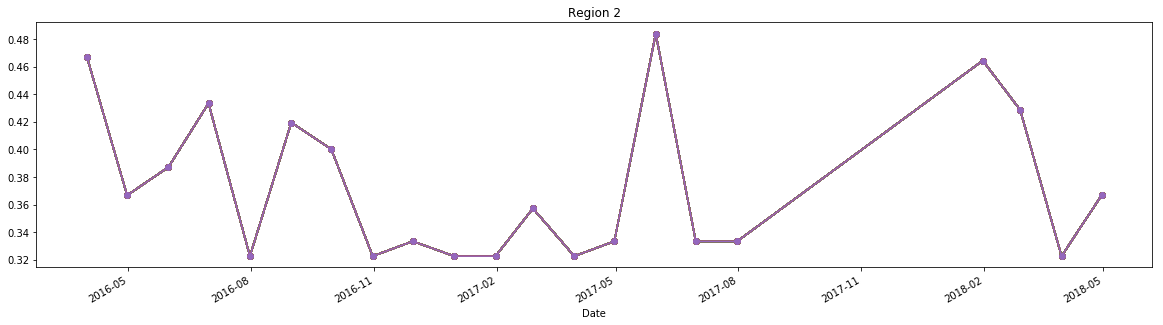

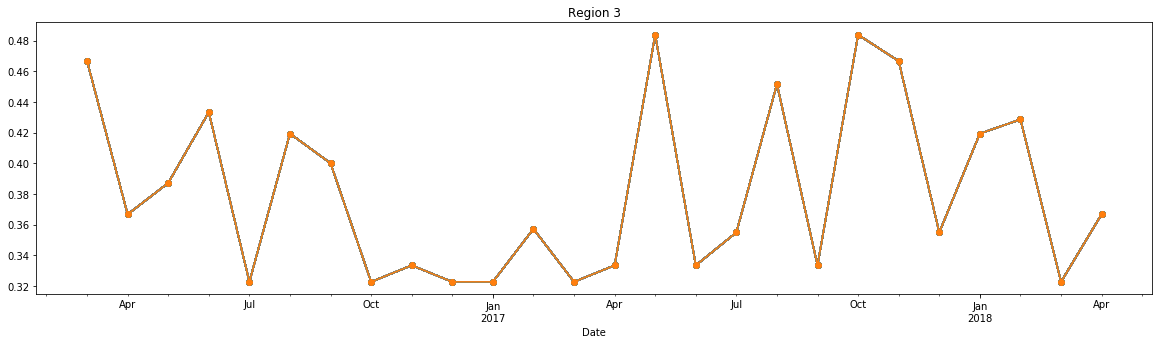

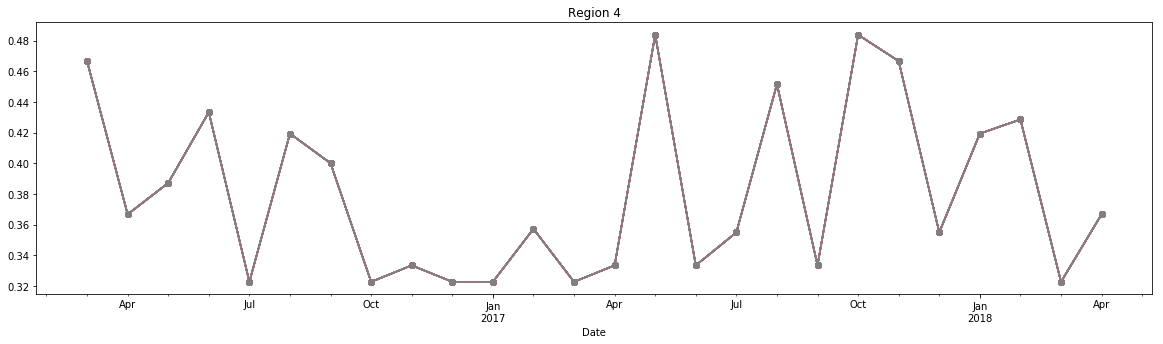

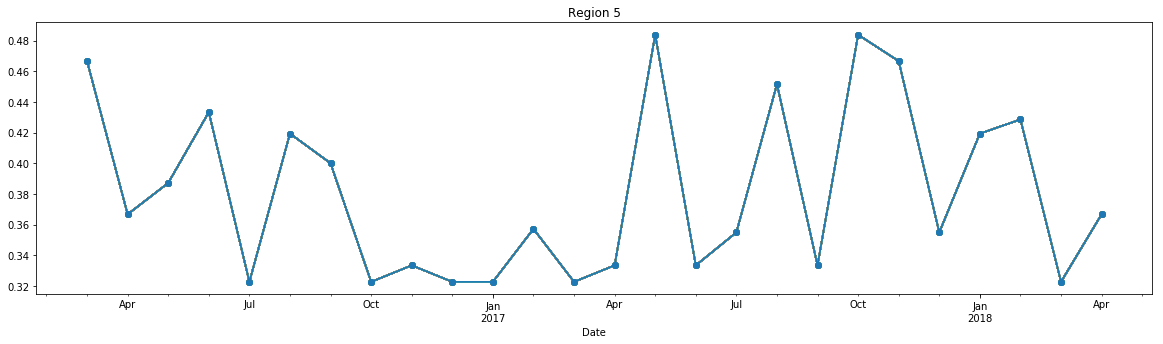

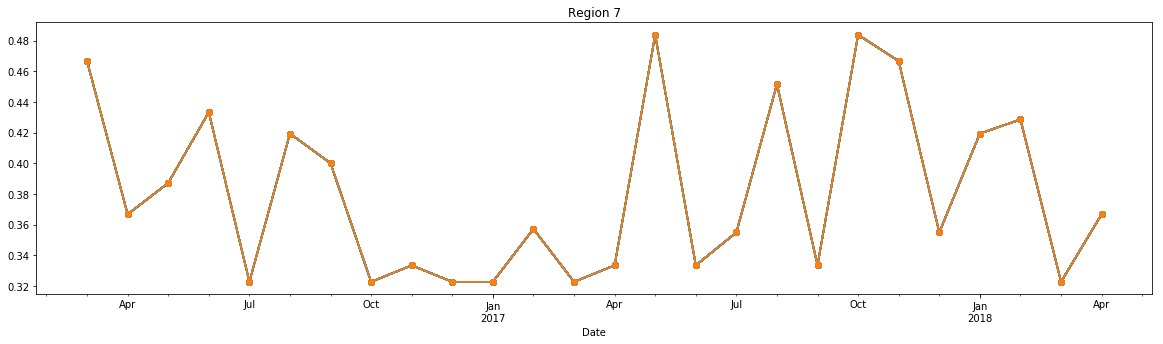

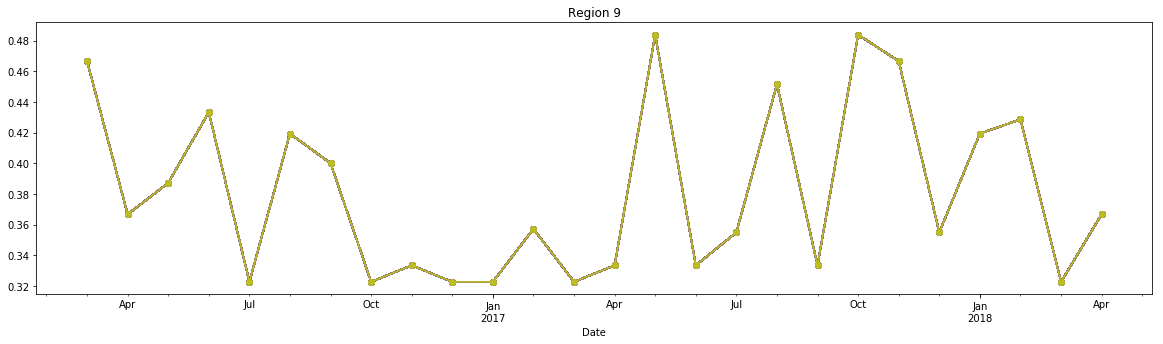

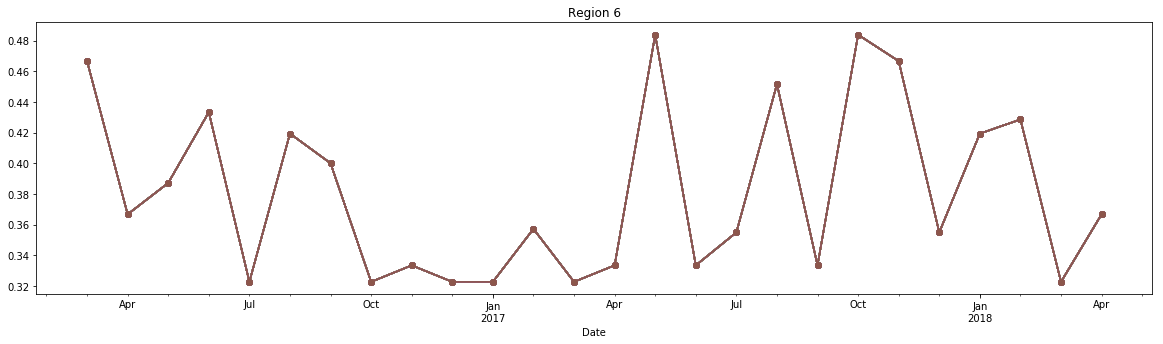

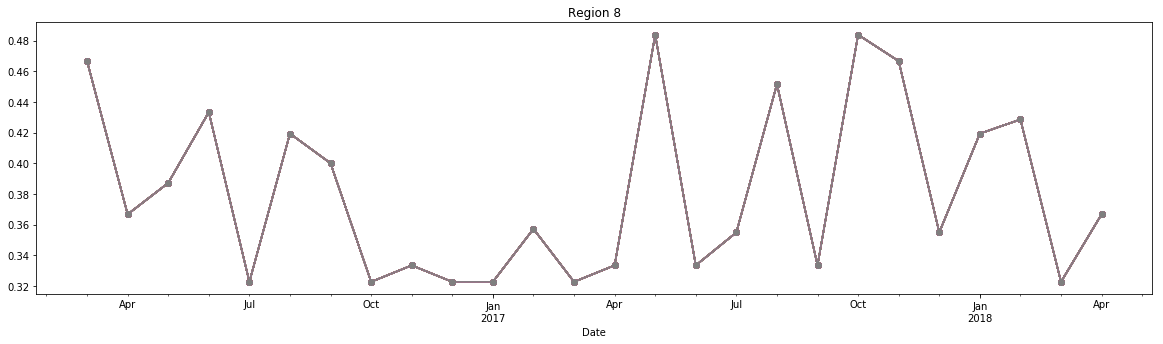

In [21]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['HasPromotions'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

##### Max Humidity for each region

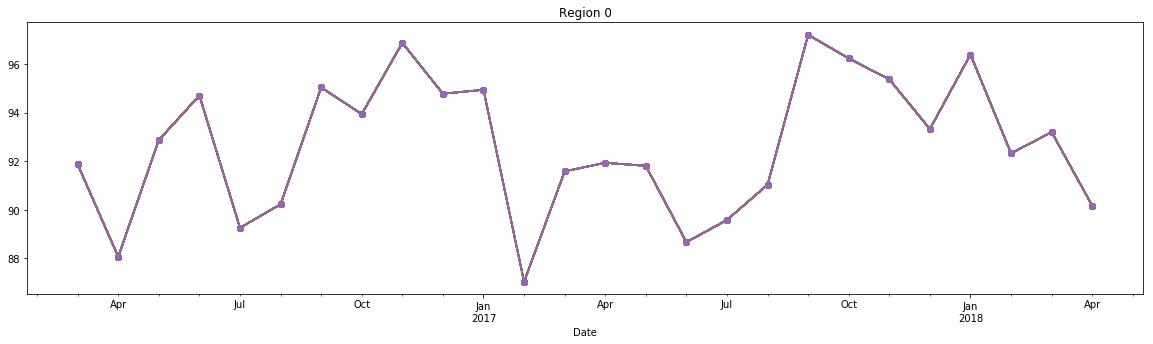

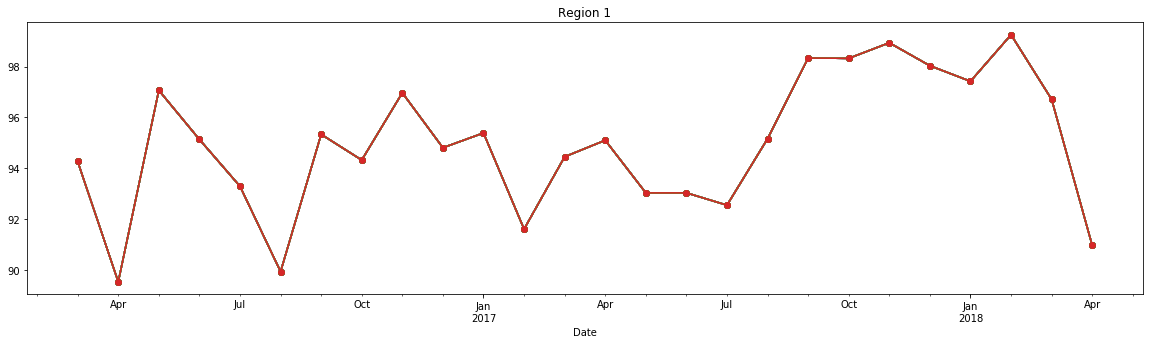

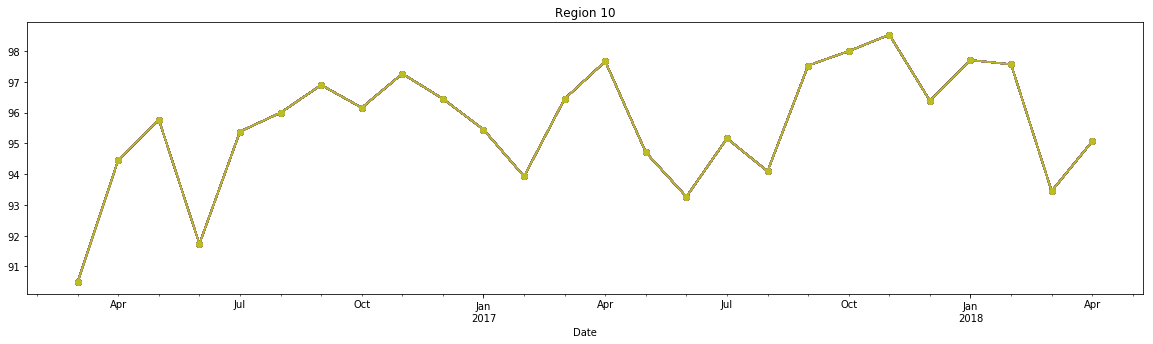

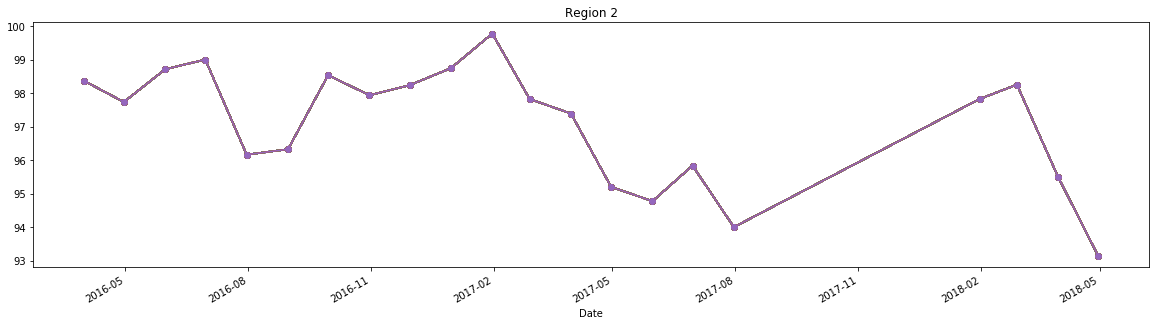

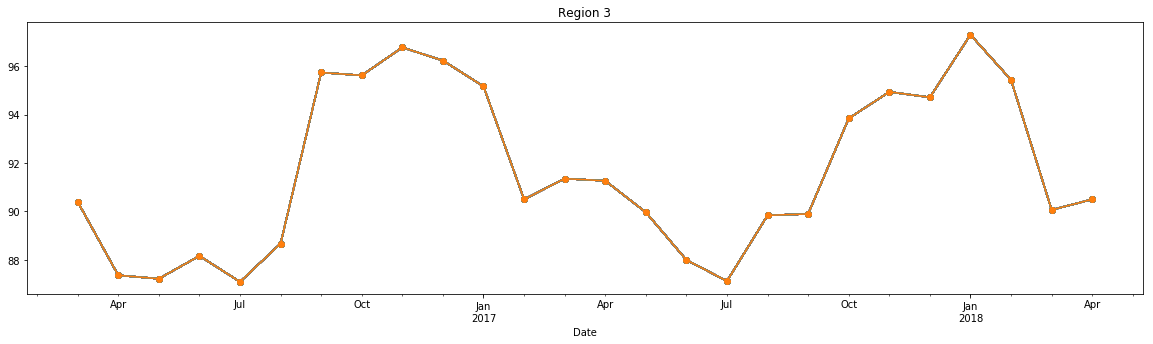

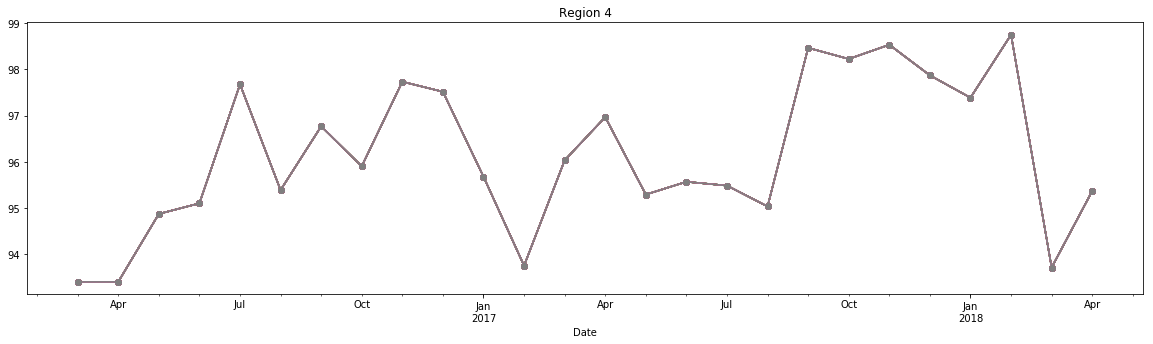

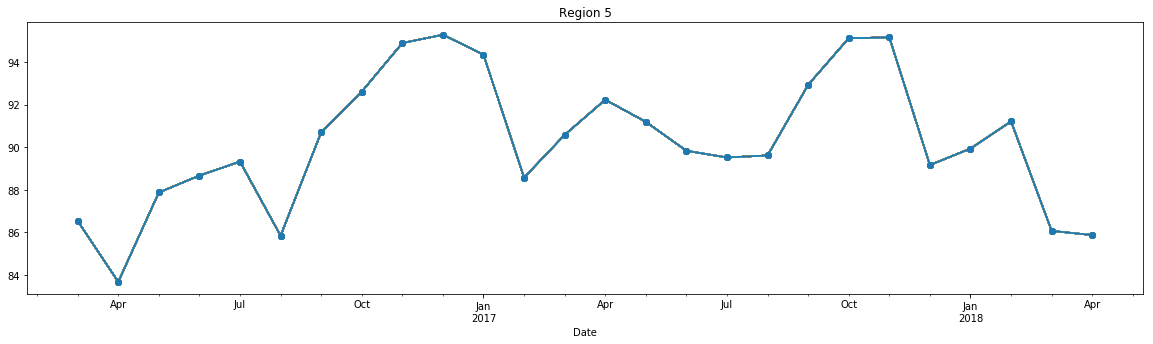

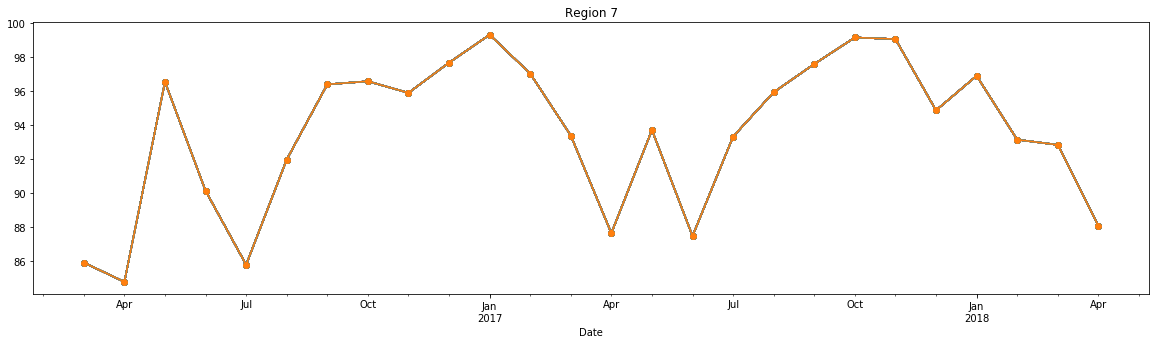

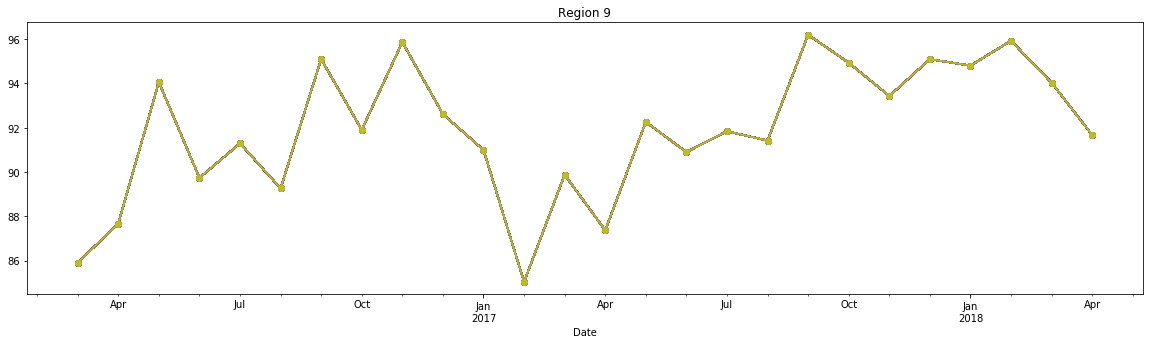

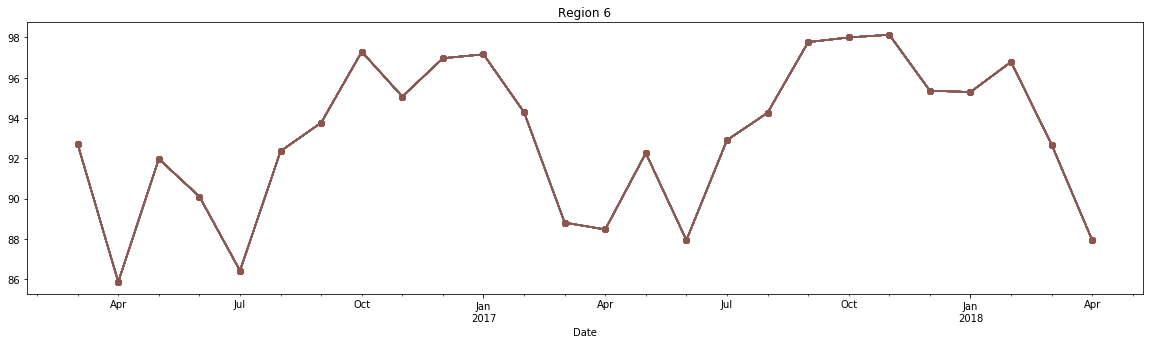

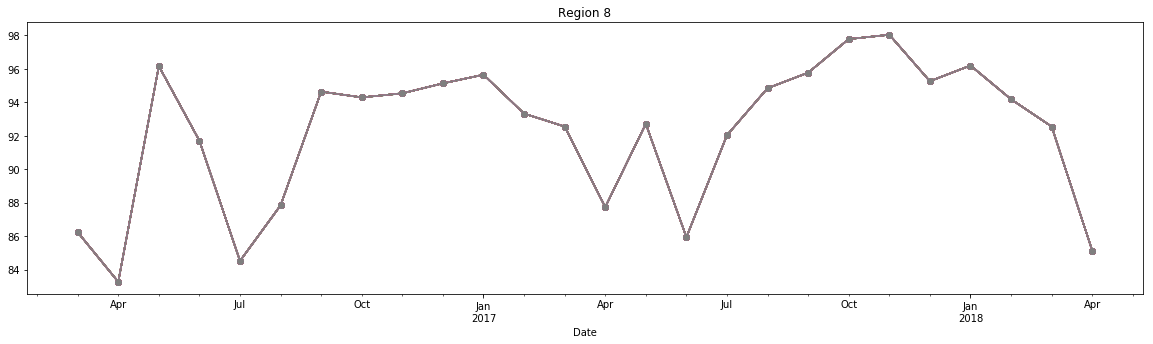

In [22]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['Max_Humidity'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

##### Precipitation mm for each region

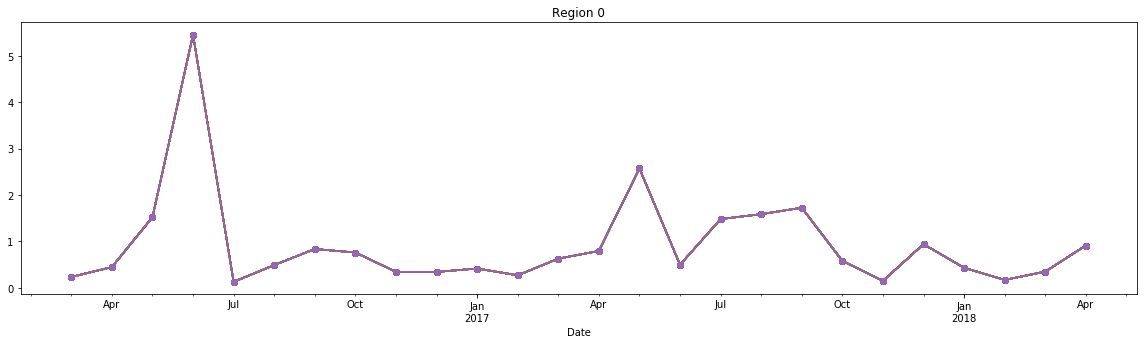

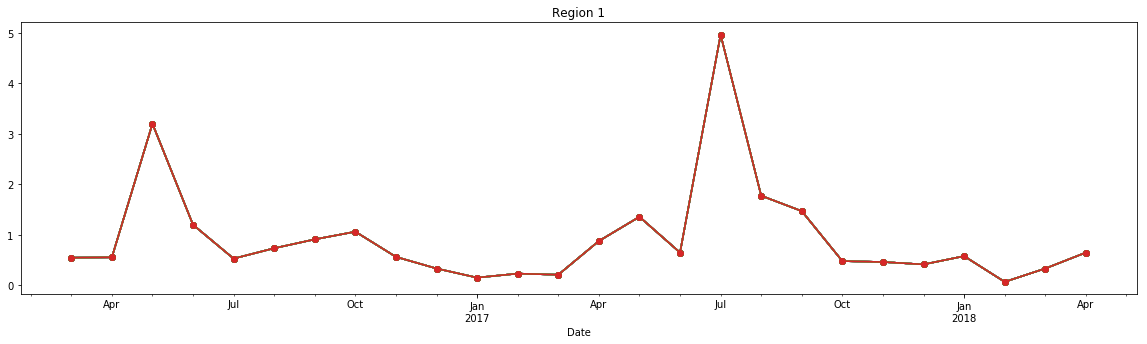

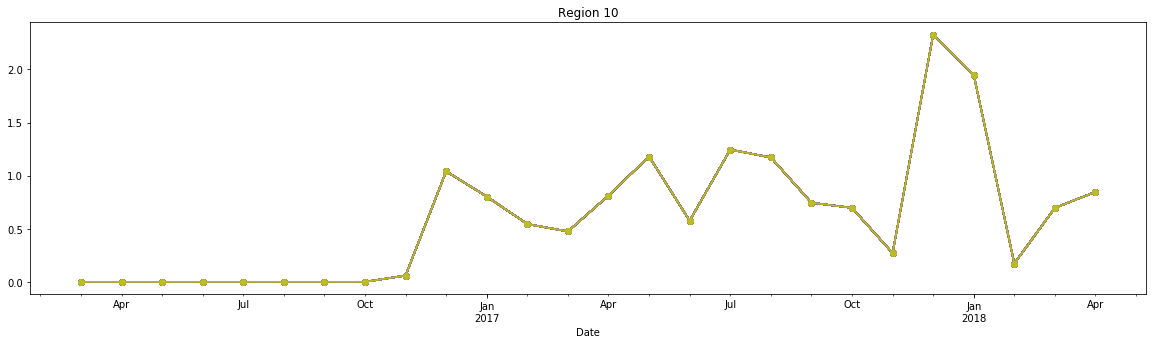

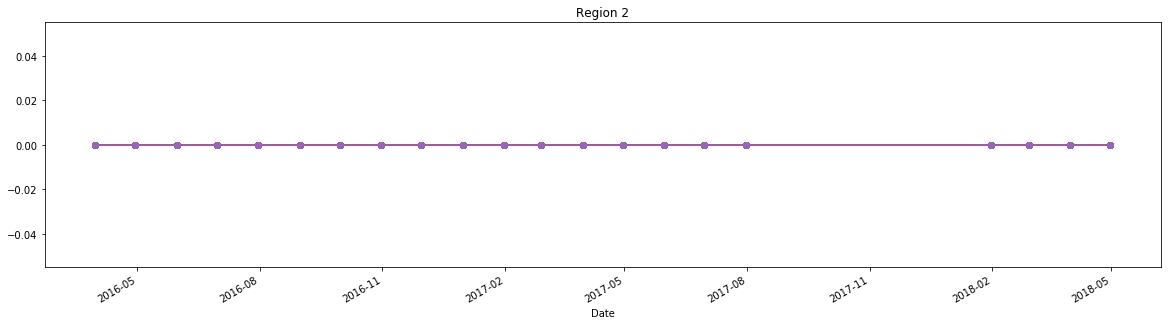

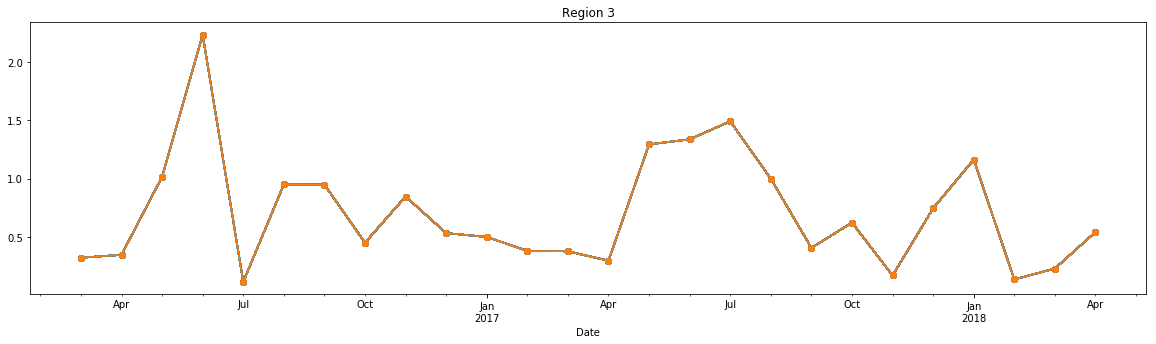

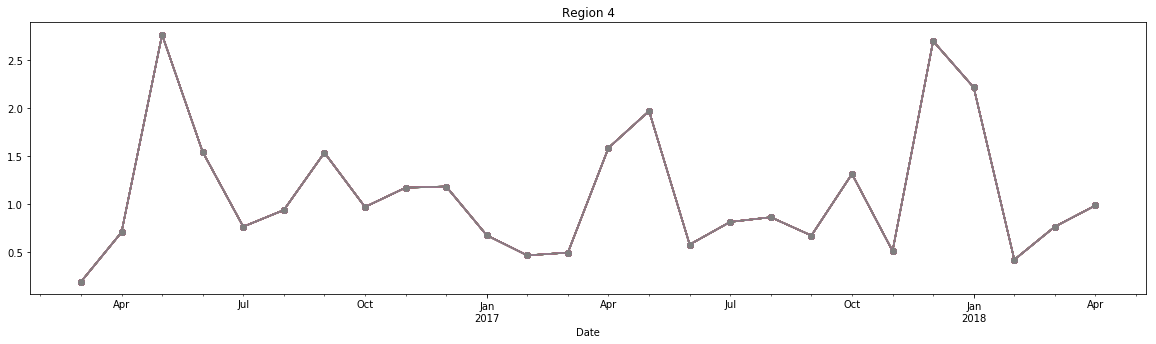

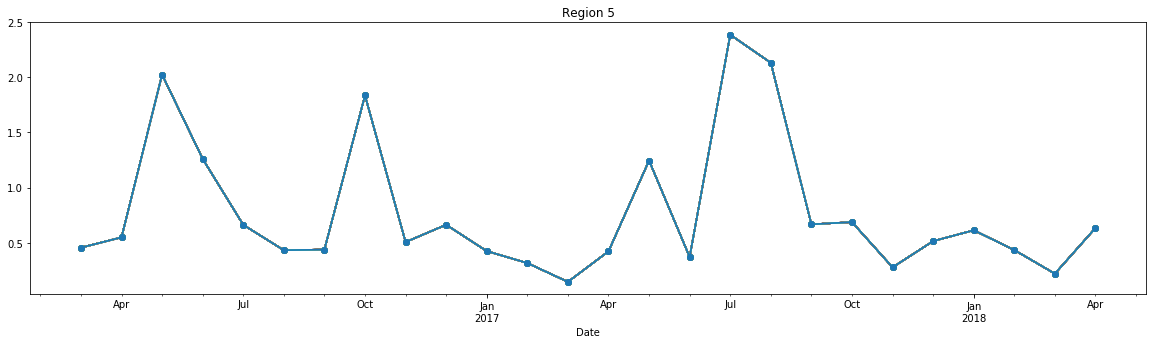

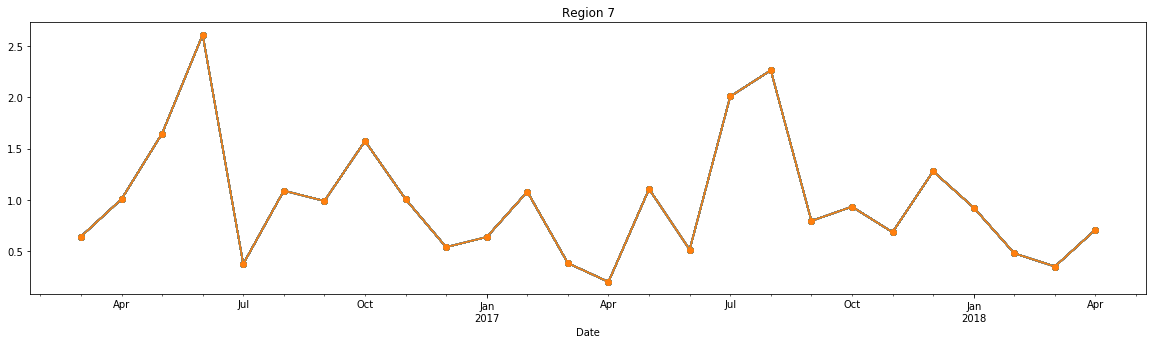

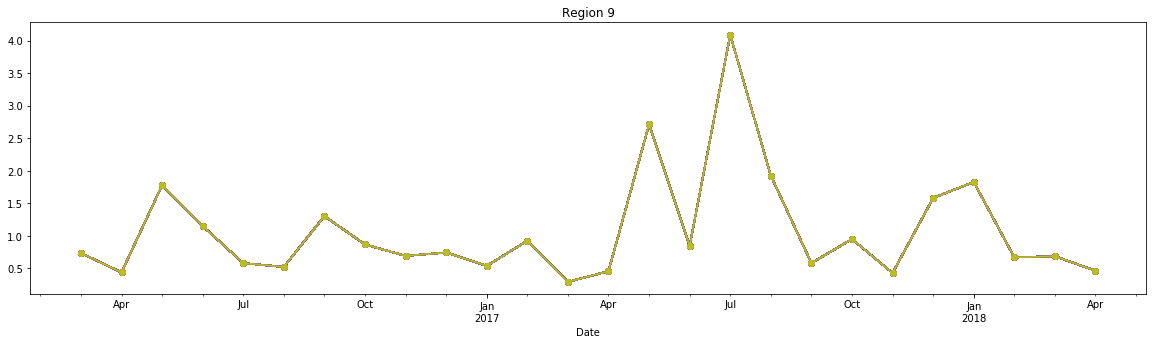

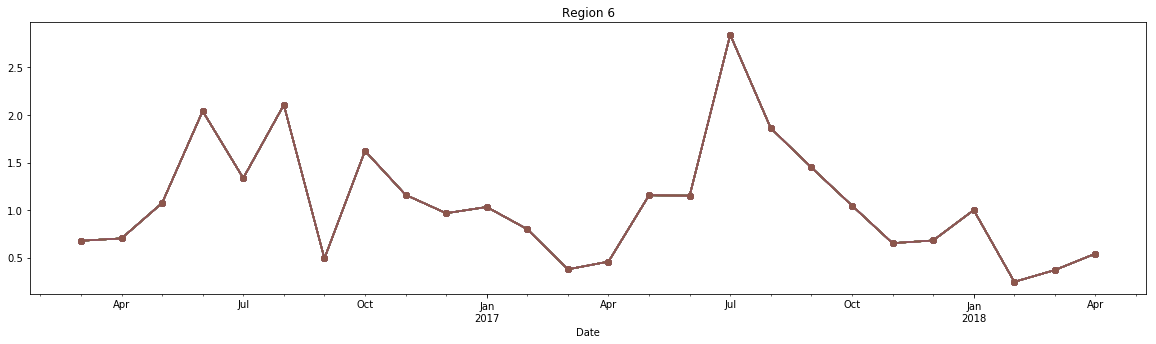

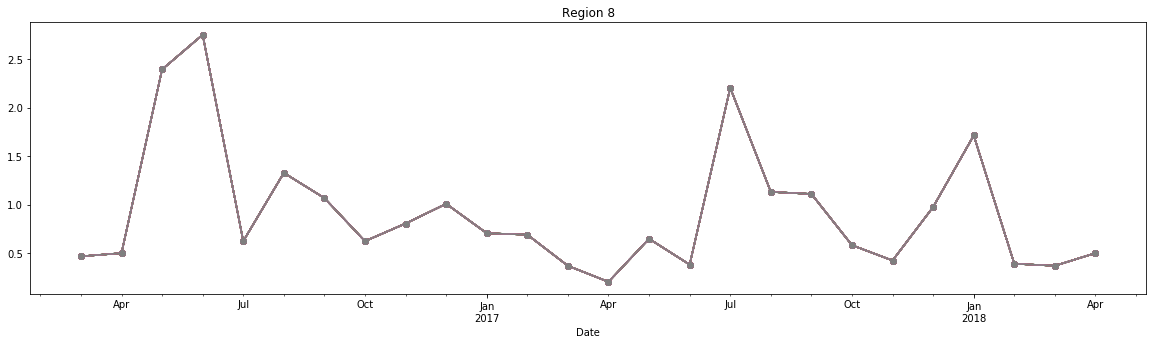

In [23]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['Precipitationmm'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

##### Mean Sea Level Pressure (Pascal) for each region

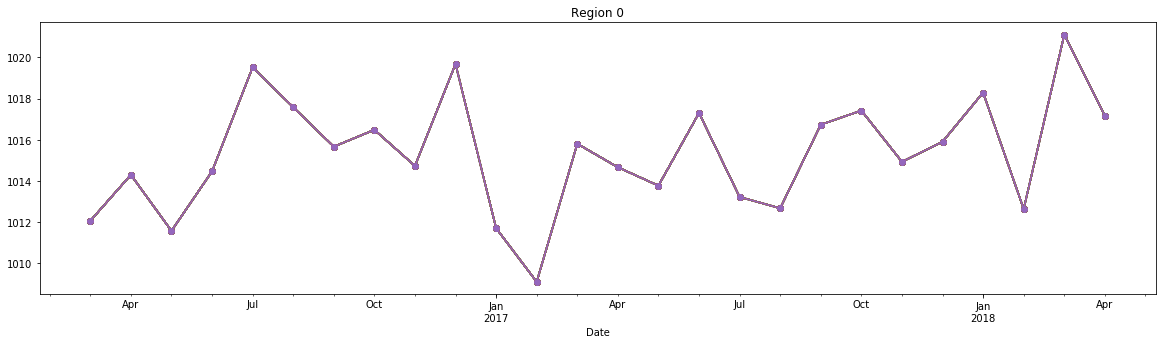

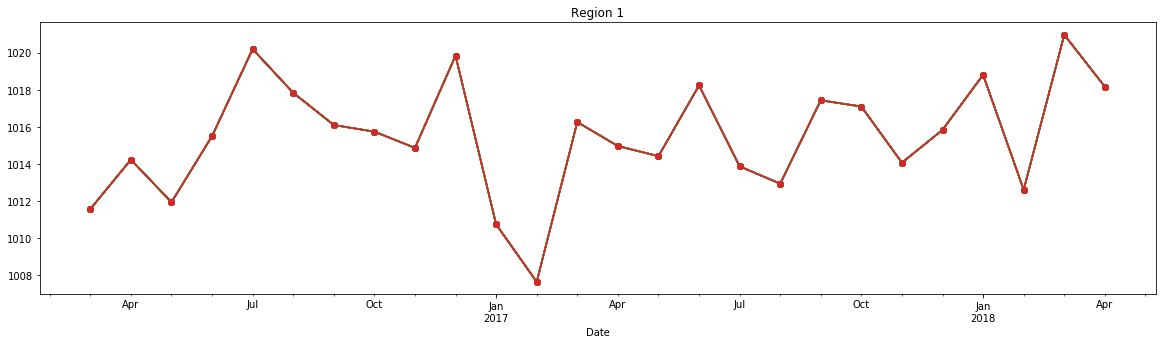

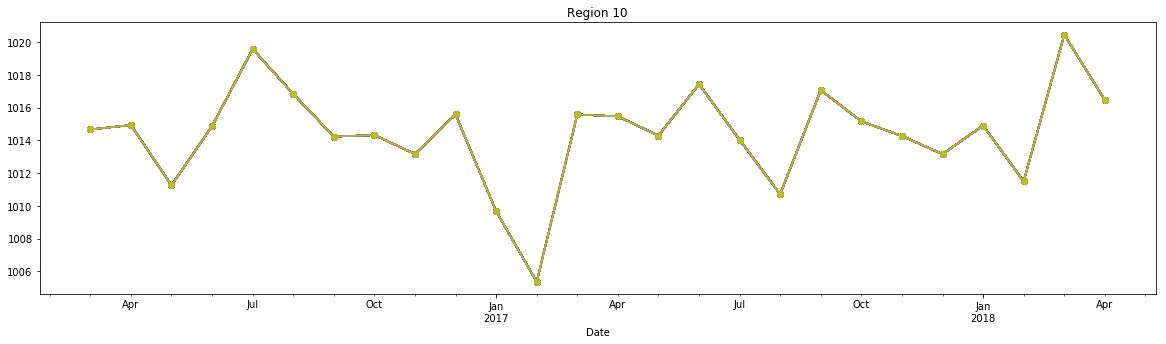

In [ ]:
for regionID, region in monthly_sales_all.groupby('Region'):
    for storeID, store in region.groupby('StoreID'):
        ts = pd.Series(store['Mean_Sea_Level_PressurehPa'].values, index=store['Date']).\
        plot(figsize=(20,5), title='Region {}'.format(regionID), marker='o')
    plt.show()

# Correlation
Pearson correlation measures a linear dependence between two variables (x and y).

It can be used only when x and y are from normal distribution. The plot of y = f(x) is named the linear regression curve.

In [ ]:
# Correlation
train_corr = train.drop(['StoreID'], axis=1).corr()

plt.figure(figsize = (20,20))
sns.heatmap(train_corr, square=True, annot=True, cmap="Blues", cbar=False);

In [ ]:
s = train_corr.unstack().sort_values(ascending=False)
# filter tuple keys with same value, inverted value and values < 0.5
s[[i[0]!=i[1] in i for i in s.index]].iloc[::2][s >= 0.5]

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution and 
sns.distplot(train['NumberOfSales'] , fit=norm)

# and check the fitted mu and sigma
(mu, sigma) = norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')